# 0. Download Packages

In [1]:
import os
import sys
import math
import random
import pickle
import warnings
import matplotlib.dates as mdates

from datetime import datetime, timedelta
from bisect import bisect_left
from itertools import combinations
from math import sqrt

import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.tseries.offsets import MonthEnd
from matplotlib.patches import Rectangle

from scipy import stats
from scipy.stats import (norm, skew, kurtosis, pearsonr, spearmanr, kendalltau)
from scipy.optimize import curve_fit

from sklearn.metrics import mean_squared_error

import pysal
from numpy.random import Generator, PCG64
from functools import partial


file = "C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/"

import sys
sys.path.append(file)

import nbimporter
import FUNCTION_LIST as ChatJR # This will import all top-level functions/definitions from the notebook

import pandas as pd
import numpy as np
!pip install python-docx
from docx import Document

import pandas as pd
from docx import Document
from docx.shared import Pt
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.oxml.ns import qn
from docx.oxml import OxmlElement

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from PIL import Image
from datetime import datetime, timedelta

# 1. Download Data

In [2]:
'''PERTH SD MSLP'''
P_MSLP_SD = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_METRO_PRESSURE_CORRECTED_SUBDAILY_1830-2024.csv").set_index('Date')
P_MSLP_SD.index= pd.to_datetime(P_MSLP_SD.index,format='mixed',dayfirst = True)

In [3]:
'''Cape Leeuwin SD MSLP'''
CL_MSLP_SD = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\CAPE_LEEUWIN_PRESSURE_CORRECTED_SUBDAILY_1907-2024.csv").set_index('Date')
CL_MSLP_SD.index= pd.to_datetime(CL_MSLP_SD.index,format='mixed',dayfirst = True)

In [4]:
'''Cape OTWAY D MSLP'''
CO_MSLP_D = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\CAPE_OTWAY_PRESSURE_CORRECTED_DAILY_1861-2024.csv")
CO_MSLP_D.set_index('Date',inplace = True)
CO_MSLP_D.index= pd.to_datetime(CO_MSLP_D.index,dayfirst = True,format='mixed')

In [5]:
'''RAINDAYS'''
'''PERTH RAIN'''

#PERTH METRO
PM_RD = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_METRO_RAINFALL_BOM_DAILY_1993-2025.csv")
# Convert Year, Month, Day into a single Date column

PM_RD['Date'] = pd.to_datetime(PM_RD[['Year', 'Month', 'Day']])
#Convert to rainfall and index as date
PM_RD['RAINFALL'] = PM_RD['Rainfall amount (millimetres)']
PM_RD = PM_RD.set_index('Date')

#Drop all dates where rainfall data was actually not recorded
PM_RD = PM_RD[['RAINFALL']].dropna()

#Rename 'Period over which rainfall was measured (days)' to 'RAINDAYS'
PM_RD['RAINDAYS'] = PM_RD['RAINFALL'].apply(lambda x: 1 if x > 0.4 else 0)
#Split to raindays and rainfall
PM_RF =PM_RD[['RAINFALL']]
PM_RD =PM_RD[['RAINDAYS']]

#PERTH AIRPORT
PA_RD = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_AIRPORT_RAINFALL_BOM_DAILY_1944-2025.csv")

# Convert Year, Month, Day into a single Date column

PA_RD['Date'] = pd.to_datetime(PA_RD[['Year', 'Month', 'Day']])
#Convert to rainfall and index as date
PA_RD['RAINFALL'] = PA_RD['Rainfall amount (millimetres)']
PA_RD = PA_RD.set_index('Date')

#Drop all dates where rainfall data was actually not recorded
PA_RD = PA_RD[['RAINFALL']].dropna()

#Rename 'Period over which rainfall was measured (days)' to 'RAINDAYS'
PA_RD['RAINDAYS'] = PA_RD['RAINFALL'].apply(lambda x: 1 if x > 0.4 else 0)
#Split to raindays and rainfall
PA_RF =PA_RD[['RAINFALL']]
PA_RD =PA_RD[['RAINDAYS']]
PA_RD

#Perth Gardens 5 year gap 
PG_RD = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_GARDENS_RAINDAYS_MONTHLY_1876-1879.csv")
PG_RD['Date'] = pd.to_datetime(PG_RD['Date'],dayfirst =  False)
PG_RD = PG_RD.set_index('Date')
PG_RD.index = PG_RD.index.to_period('M').to_timestamp()


PRO_RD = pd.read_csv(
    r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_REGIONAL_OFFICE_RAINFALL_BOM_DAILY_1877-1992.csv",header=None,
    names=['Date', 'Rainfall', 'Raindays'], index_col=0)
PRO_RD= PRO_RD[['Rainfall']].dropna()
PRO_RD.index = pd.to_datetime(PRO_RD.index,format ='mixed',dayfirst = False)

PRO_RD['RAINDAYS'] = PRO_RD['Rainfall'].apply(lambda x: 1 if x > 0.4 else 0)
PRO_RD['RAINFALL'] = PRO_RD['Rainfall']
PRO_RF =PRO_RD[['RAINFALL']]
PRO_RD =PRO_RD[['RAINDAYS']]
PRO_RD

SWR_RD = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\SWAN_RIVER_RAINDAYS_TRANSCRIBED_DAILY_1830-1875.csv")
SWR_RD
SWR_RD['Date'] = pd.to_datetime(SWR_RD['Unnamed: 0'],format ='mixed',dayfirst = False)
SWR_RD
SWR_RD =SWR_RD[['Date','rr']]
SWR_RD.set_index('Date',inplace = True)
SWR_RD.rename(columns={'rr': 'RAINDAYS'}, inplace=True)
# Ensure RAINDAYS is numeric (in case it's read as string)
SWR_RD['RAINDAYS'] = pd.to_numeric(SWR_RD['RAINDAYS'], errors='coerce')
# Drop duplicates, keeping the entry with RAINDAYS = 1 if it exists
SWR_RD = SWR_RD.groupby(SWR_RD.index).max()
SWR_RD



P_RD_D = pd.concat([SWR_RD,PG_RD,PRO_RD.loc['1880-01-01':'1992-04-30'],PA_RD['1992-05-01':'1993-01-31'],PM_RD['1993-02-01':]]) #Perth Metro
#P_RD_D = pd.concat([SWR_RD,PG_RD,PRO_RD.loc['1880-01-01':'1992-04-30'],PA_RD['1992-05-01':]])#'1993-01-31'],PM_RD['1993-02-01':]]) #Perth Airport
#P_RD_M = P_RD_D.resample('MS').sum()#
#P_RD_Y = P_RD_M.resample('YS').sum()#

P_RD_D,P_RD_M,P_RD_Y =  ChatJR.SD_Y_WMO_GL(P_RD_D,'Date','RAINDAYS',True)

P_RD_M= P_RD_M.combine_first(PG_RD)
P_RD_Y= P_RD_Y.combine_first(PG_RD.resample('YS').sum()).round(0)

P_RD= [P_RD_D,P_RD_M,P_RD_Y]
#P_RF_D = pd.concat([PRO_RF.loc['1880-01-01':],PA_RF['1992-05-01':]])#'1993-01-31'],PM_RF['1993-02-01':]]) #Perth Airport
P_RF_D = pd.concat([PRO_RF.loc['1880-01-01':],PA_RF['1992-05-01':'1993-01-31'],PM_RF['1993-02-01':]]) #Perth Metro
P_RF_D,P_RF_M,P_RF_Y =  ChatJR.SD_Y_WMO_GL(P_RF_D,'Date','RAINFALL',True)
P_RF= [P_RF_D,P_RF_M,P_RF_Y]
P_RD = P_RD[0]

P_RF = P_RF[0]
#'''PERTH RAINFALL'''
# Create a date range for a month, including hours
date_range = pd.date_range(start="1830-05-22", end="1879-12-31", freq="D")

# Create the dataframe with NaN values for the 'RAINDAYS' column
Rainfall_30_79 = pd.DataFrame(index=date_range)
Rainfall_30_79.index.name = 'Date'
Rainfall_30_79['RAINFALL'] = np.nan

P_RF = pd.concat([Rainfall_30_79,P_RF],axis= 0).sort_index()
P_RF

FUNCTION_LIST.ipynb:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "import warnings\n",
FUNCTION_LIST.ipynb:93: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "if \"docx.py\" in cwd_files or \"docx\" in cwd_files:\n",
FUNCTION_LIST.ipynb:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant

RAINFALL
Date                
1830-05-22       NaN
1830-05-23       NaN
1830-05-24       NaN
1830-05-25       NaN
1830-05-26       NaN
...              ...
2025-08-15       0.6
2025-08-16       0.2
2025-08-17       0.0
2025-08-18       0.0
2025-08-19       0.0

[71254 rows x 1 columns]

# 1. Download XARRAY FIELS FOR 20CR

In [6]:
#Lets play with the predata
# Shape of Australia
borders_gdf = gpd.read_file(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\Shape Files\World Shape\ne_10m_admin_0_countries.shp")

# If needed, set the crs (coordinate reference system) for the GeoDataFrame
# For example, if your data is in WGS84 (EPSG:4326), you can set the crs as follows:
borders_gdf.crs = 'EPSG:4326'

# 2. Plan of Action

1. Develop a storm finding function based off the methodology of alexander 2009 storm indentification index,

2. Includes the <1 to >99 6 hr or 18 hr tendency, ensure consecutvie days are 1 storms

3. Cross check with rainfall and raindays with 25mm or more, keep storms with under 25mm if one of the other days is over 25mm, this means the storm ID is checked

4. Create bar chart with storms over time, for the overall winter storms

5. Calculate the % from 1880-1909 with 1995-2024

6. Use Cape Leeuwin to further prove significant storms and the create the gradient bewteeen the two place and send to Stefan

7. Work out % of rainfall for perth associated with winter storms

8. Plot graphs and use 20CR for spatial reanalysis

9. Use the 20CR to also check the gradient between the two regions

10. Use storms for rough sam identification

# 3. Extreme Storms Function

In [7]:
def Storm_Finder_v3(Pressure,Months_Inc, Tendency = False, Rainfall_Received = False, Raindays= [], Rainfall= [],Rainfall_Target=25):
    '''
    INPUTS:
    Pressure - Subdaily pressure record in 9am and 3pm values only for tendency calculation

    Months_Inc - Subsetting to ensure period you want to look at it like winter, ext winter, summer etc : [x,y,z]

    Tendency - Do you want tendency outputted : True or False

    Rainfall_Received - Do we have rainfall involved : True or False
    
    Raindays - Dataframe
    
    Rainfall - Dataframe
    
    Rainfall_Target - Target of how you find the extremes
    OUTPUTS:
    '''

    #Fix data so its all filled up with 24hours
    All_Dates = pd.date_range(start=Pressure.index.min(), end=Pressure.index.max(), freq='h')
    All_Dates = pd.DataFrame(index=All_Dates, columns=[Pressure.columns[0]])

    #Insert the missing hours into the Pressure dataset
    Pressure = All_Dates.combine_first(Pressure)
    Pressure_for_later = Pressure.copy() # Will be useful for a later step

    #Extract 9am and 3pm only since we are following Alexander et al. 2009 paper
    Pressure = Pressure[Pressure.index.hour.isin([9, 15])]
    # Make sure Pressure is sorted by datetime index
    Pressure = Pressure.sort_index()
    
    #Save 9am and 3pm and 9am+1
    Pressure_9am = Pressure[Pressure.index.hour == 9]
    Pressure_3pm = Pressure[Pressure.index.hour == 15]
    Pressure_9am_1 = Pressure_9am.copy()
    
    #-24 means that that 9am value should be included in the previous days Minimum search
    Pressure_9am_1.index = Pressure_9am_1.index - np.timedelta64(24, 'h')

    #Rename
    Pressure_9am = Pressure_9am.rename(columns = {'MSLP':'9am MSLP (hPa)'})
    Pressure_3pm = Pressure_3pm.rename(columns = {'MSLP':'3pm MSLP (hPa)'})
    Pressure_9am_1 = Pressure_9am_1.rename(columns = {'MSLP':'9am+1d MSLP (hPa)'})
    
    #Set date and set index
    Pressure_9am['Date'] = Pressure_9am.index.strftime('%Y-%m-%d')
    Pressure_9am['Date'] = pd.to_datetime(Pressure_9am['Date'],dayfirst = True, format='mixed')
    Pressure_9am.set_index('Date',inplace =  True)
    Pressure_3pm['Date'] = Pressure_3pm.index.strftime('%Y-%m-%d')
    Pressure_3pm['Date'] = pd.to_datetime(Pressure_3pm['Date'],dayfirst = True, format='mixed')
    Pressure_3pm.set_index('Date',inplace =  True)
    Pressure_9am_1['Date'] = Pressure_9am_1.index.strftime('%Y-%m-%d')
    Pressure_9am_1['Date'] = pd.to_datetime(Pressure_9am_1['Date'],dayfirst = True, format='mixed')
    Pressure_9am_1.set_index('Date',inplace =  True)

    #Start calculating tendency
    # Calculate time difference to the next time (in hours)
    Pressure["Hours_to_next"] = (Pressure.index.to_series().shift(-1) - Pressure.index.to_series()).dt.total_seconds() / 3600
    # Calculate tendency (difference between current and next MSLP)
    Pressure["Tendency"] = Pressure[P_MSLP_SD.columns[0]].shift(-1) - Pressure[Pressure.columns[0]]
    '''
    Note: The tendency is calculated on the day of focus so row 1003.0 3.8, means in 6hrs it will be
    1006.8hPa this is to indentify the change on that particular day
    '''

    #Now we need to work out the 1st and 99th percentile tendency values of both 6hr and 18hr
    T_6hr = Pressure[Pressure['Hours_to_next'] == 6][['Tendency']]
    T_6hr["Tendency"] = pd.to_numeric(T_6hr["Tendency"], errors='coerce')
    
    T_18hr = Pressure[Pressure['Hours_to_next'] == 18][['Tendency']]
    T_18hr["Tendency"] = pd.to_numeric(T_18hr["Tendency"], errors='coerce')

    #Now identify the extreme tendency values 
    #Work out 1st and 99th percentile for each month
    T_6hr['month'] = T_6hr.index.month
    T_18hr['month'] = T_18hr.index.month
        
    #For each month, now we have the range where the most extreme cases occur
    percentiles_ind_6hr = T_6hr.dropna().groupby('month')['Tendency'].quantile([0.01, 0.99])     
    percentiles_ind_18hr = T_18hr.dropna().groupby('month')['Tendency'].quantile([0.01, 0.99])

    # Convert to DataFrame and unstack the quantile level
    percentiles_ind_6hr = percentiles_ind_6hr.unstack(level=1)
    percentiles_ind_18hr = percentiles_ind_18hr.unstack(level=1)

    # rename columns for clarity
    percentiles_ind_6hr.columns = ['1st', '99th']
    percentiles_ind_18hr.columns = ['1st', '99th']

    #Now identify ALL dates above or below the tendency thresholds
    #6hr
    date_kept_6 = []
    
    #Iterate through the entire timeseries
    for row in T_6hr.itertuples():
        # Extract the month and tendency from the row
        mth = row.month
        tend = row.Tendency
    
        #Extract the 99th and 1st percentile
        if (tend <= percentiles_ind_6hr['1st'][mth]) | (tend >= percentiles_ind_6hr['99th'][mth]):
            date_kept_6.append(row.Index)
        else:
            x = 0

                
    #18hr
    date_kept_18 = []
    
    #Iterate through the entire timeseries
    for row in T_18hr.itertuples():
        # Extract the month and tendency from the row
        mth = row.month
        tend = row.Tendency
    
        #Extract the 99th and 1st percentile
        if (tend <= percentiles_ind_18hr['1st'][mth]) | (tend >= percentiles_ind_18hr['99th'][mth]):
            date_kept_18.append(row.Index)
        else:
            x = 0
    
    
    #Keeps date and hour
    date_kept_6 = pd.DataFrame(date_kept_6, columns=['Date']).set_index('Date')
    date_kept_18 = pd.DataFrame(date_kept_18, columns=['Date']).set_index('Date')

    #Combine the potential storms together #These are POTENTIAL STORMS
    Pot_Storms = pd.concat([date_kept_6,date_kept_18],axis = 1).sort_index()

    #Merge with the actual tendency and MSLP data
    Pot_Storms = pd.merge(Pot_Storms,Pressure,how = 'inner',left_index = True, right_index= True)
    
    #Change to datetime
    Pot_Storms['Date'] = Pot_Storms.index.strftime('%Y-%m-%d')

    #Now we ID the Potential Storms
    # Calculate the difference between consecutive dates
    Pot_Storms['Date'] = pd.to_datetime(Pot_Storms['Date'],dayfirst = True, format='mixed')
    Pot_Storms['Time Between Potential Storms'] = Pot_Storms['Date'].diff().dt.days
    # Identify new groups where the difference is not 1 day
    Pot_Storms['Storms'] = (Pot_Storms['Time Between Potential Storms'] > 1).cumsum() + 1

    #Now add next periods pressure
    Pot_Storms.set_index('Date',inplace = True)
    Pot_Storms['MSLP Next Time'] = Pot_Storms['MSLP'] + Pot_Storms['Tendency']

    #Now we need to add in the 9am and 3pm and the next days values for that particular day
    Pot_Storms = pd.merge(Pot_Storms,Pressure_9am,how = 'inner',left_index = True, right_index= True)
    Pot_Storms = pd.merge(Pot_Storms,Pressure_3pm,how = 'inner',left_index = True, right_index= True)
    Pot_Storms = pd.merge(Pot_Storms,Pressure_9am_1,how = 'inner',left_index = True, right_index= True)

    #Now subset the storms to the dates you want 
    Pot_Storms = ChatJR.filter_dataframe_by_months(Pot_Storms, Months_Inc)

    # Calculate the difference between consecutive dates to re-ID them
    Pot_Storms['Time Between Potential Storms'] = Pot_Storms.index.diff().days
    # Identify new groups where the difference is not 1 day
    Pot_Storms['Storms'] = (Pot_Storms['Time Between Potential Storms'] > 1).cumsum()+1
    es_cols = Pot_Storms.columns
    
    #Rename 
    Pot_Storms =Pot_Storms.rename(columns = {Pressure.columns[0] :'MSLP (hPa)'})
    Pot_Storms =Pot_Storms.rename(columns = {es_cols[1] :'Hours To Next MSLP Reading'})
    Pot_Storms =Pot_Storms.rename(columns = {es_cols[2] :'MSLP Change (hPa)'})
    Pot_Storms =Pot_Storms.rename(columns = {es_cols[3] :'Days between Storms'})
    Pot_Storms =Pot_Storms.rename(columns = {es_cols[4] :'Storm ID'})
    Pot_Storms =Pot_Storms.rename(columns = {es_cols[5] :'Next MSLP Reading (hPa)'})
    Pot_Storms = Pot_Storms.reset_index().set_index('Storm ID')

    #Potential Storm List 
    Potential_Storm_List = Pot_Storms[['Date','9am MSLP (hPa)','3pm MSLP (hPa)','9am+1d MSLP (hPa)']]

    #Now add rainfall and raindays, we want to keep the entirety of the ID to ensure full storm is captured
    if Rainfall_Received == True:
        Storms = Potential_Storm_List.set_index('Date')
        #filter raindays into it
        Storms = pd.merge(Storms, Raindays, how='inner', left_index=True, right_index=True)
        Storms = pd.merge(Storms, Rainfall, how='inner', left_index=True, right_index=True)
        Storms.index.name = 'Date'

        #Identify if rainfall and raindays is in there
        Storms = Storms[Storms[Raindays.columns[0]] == 1]

        #Find the time between storms again and ID them
        Storms['Days between Storms'] = Storms.index.diff().days
        Storms['Storm ID'] = (Storms['Days between Storms'] > 1).cumsum()+1

        Storms = Storms[['Storm ID','9am MSLP (hPa)','3pm MSLP (hPa)','9am+1d MSLP (hPa)','RAINFALL']]

        #Extract rainfall target events (only the ID)
        Ext_Storms_ID_List = Storms[Storms[Rainfall.columns[0]] >= Rainfall_Target][['Storm ID']]
        Ext_Storms_ID_List = Ext_Storms_ID_List.drop_duplicates(subset='Storm ID')

        #Ensure Get back the storms with that ID list
        Extreme_Storms = Storms.reset_index().merge(Ext_Storms_ID_List, how='inner', left_on='Storm ID', right_on='Storm ID').set_index('Date')
        Extreme_Storms['Days between Storms'] = Extreme_Storms.index.diff().days
        Extreme_Storms['Storm ID'] = (Extreme_Storms['Days between Storms'] > 1).cumsum()+1
        
        
        #Clean Storm and Extreme Storm Lists
        Extreme_Storm_List = Extreme_Storms.reset_index().set_index('Storm ID')[['Date','9am MSLP (hPa)','3pm MSLP (hPa)','9am+1d MSLP (hPa)','RAINFALL']]
        Extreme_Storm_List = Extreme_Storm_List.rename(columns={Rainfall.columns[0]: "Rainfall"})
        Storm_List = Storms.reset_index().set_index('Storm ID')[['Date','9am MSLP (hPa)','3pm MSLP (hPa)','9am+1d MSLP (hPa)','RAINFALL']]
        Storm_List = Storm_List.rename(columns={Rainfall.columns[0]: "Rainfall"})


        #Now we need the NaN list to infil with written information
        Storms_RF_NaNs = Storms[Storms[Rainfall.columns[0]].isna()]

        # Calculate the difference between consecutive dates to re-ID them
        Storms_RF_NaNs['Time Between Potential Storms'] = Storms_RF_NaNs.index.diff().days
        # Identify new groups where the difference is not 1 day
        Storms_RF_NaNs['Storms'] = (Storms_RF_NaNs['Time Between Potential Storms'] > 1).cumsum()+1
        Storms_RF_NaNs_List = Storms_RF_NaNs.reset_index().set_index('Storm ID')[['Date','9am MSLP (hPa)','3pm MSLP (hPa)','9am+1d MSLP (hPa)','RAINFALL']]
        Storms_RF_NaNs_List = Storms_RF_NaNs_List.rename(columns={Rainfall.columns[0]: "Rainfall"})

        #Remove same dates
        Storm_List = Storm_List.drop_duplicates(subset='Date', keep='first')
        Extreme_Storm_List = Extreme_Storm_List.drop_duplicates(subset='Date', keep='first')
        Storms_RF_NaNs_List = Storms_RF_NaNs_List.drop_duplicates(subset='Date', keep='first')
        Potential_Storm_List = Potential_Storm_List.drop_duplicates(subset='Date', keep='first')

    else:
        Storm_List = []
        Extreme_Storm_List = []
        Storms_RF_NaNs_List = []
        Potential_Storm_List = Potential_Storm_List.drop_duplicates(subset='Date', keep='first')

    return(Potential_Storm_List, Storm_List, Extreme_Storm_List, Storms_RF_NaNs_List)
    
X = Storm_Finder_v3(P_MSLP_SD,[6,7,8], Tendency = True, Rainfall_Received = True, Raindays= P_RD, Rainfall= P_RF,Rainfall_Target=25)
Potential_P,Storms_P,Extreme_P,NANS_P = Storm_Finder_v3(P_MSLP_SD,[6,7,8], Tendency = True, Rainfall_Received = True, Raindays= P_RD, Rainfall= P_RF,Rainfall_Target=25)


C:\Users\jarra\AppData\Local\Temp\ipykernel_31212\3857894842.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Storms_RF_NaNs['Time Between Potential Storms'] = Storms_RF_NaNs.index.diff().days
C:\Users\jarra\AppData\Local\Temp\ipykernel_31212\3857894842.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Storms_RF_NaNs['Storms'] = (Storms_RF_NaNs['Time Between Potential Storms'] > 1).cumsum()+1
C:\Users\jarra\AppData\Local\Temp\ipykernel_31212\3857894842.py:212: SettingWithCopyWarning: 
A value is tr

In [8]:
Potential_P

Date 9am MSLP (hPa) 3pm MSLP (hPa) 9am+1d MSLP (hPa)
Storm ID                                                           
1        1830-06-03         1027.4         1017.8            1026.7
2        1830-06-30         1025.5         1020.7            1010.5
2        1830-07-01         1010.5          996.4            1006.7
3        1830-07-12         1024.7         1020.3            1008.8
4        1830-07-16         1016.5         1009.4            1010.5
...             ...            ...            ...               ...
568      2022-08-17         1011.7         1012.3            1028.5
569      2023-08-02         1007.0         1003.9            1025.2
570      2024-07-06         1018.8         1010.8            1011.1
571      2024-08-21         1018.6         1016.1            1004.2
572      2024-08-24         1008.9         1012.7            1022.0

[640 rows x 4 columns]

In [9]:
# List of indices to drop due to no storm information
indices_to_drop = [4, 7, 18, 20, 22, 23, 24, 25, 47, 51, 52, 55, 61, 62, 63, 65, 74, 75, 78, 85, 88, 89, 90]

# Drop those rows from the NANS DataFrame
NANS_cleaned = NANS_P.drop(index=indices_to_drop)

NANS_cleaned = NANS_cleaned.reset_index().set_index('Date')
Extreme_P = Extreme_P.reset_index().set_index('Date')
Extremes = pd.concat([NANS_cleaned,Extreme_P],axis = 0).sort_index()

#Find the time between storms again
Extremes['Days between Storms'] = Extremes.index.diff().days
# Identify new groups where the difference is not 1 day
Extremes['Storm ID'] = (Extremes['Days between Storms'] > 1).cumsum()+1
del Extremes['Days between Storms']
Extremes

Storm ID 9am MSLP (hPa) 3pm MSLP (hPa) 9am+1d MSLP (hPa)  Rainfall
Date                                                                          
1830-06-30         1         1025.5         1020.7            1010.5       NaN
1830-07-01         1         1010.5          996.4            1006.7       NaN
1830-07-12         2         1024.7         1020.3            1008.8       NaN
1830-07-16         3         1016.5         1009.4            1010.5       NaN
1830-08-31         4         1011.2         1018.1            1023.8       NaN
...              ...            ...            ...               ...       ...
2006-08-15       138         1007.0         1008.4            1023.2      27.0
2010-07-09       139          997.5         1004.7            1017.0      40.6
2015-06-21       140         1006.8         1008.1            1021.7      33.0
2017-08-09       141         1004.0         1009.5            1020.3      47.2
2021-07-27       142         1003.4         1007.7            1012.4      30.4

[158 rows x 5 columns]

# Now lets find the duration

In [10]:
'''RAINDAYS for 10mm or more'''
P_RF_ext = P_RF.loc['1880':]
P_RF_ext['RAINDAYS']  = P_RF_ext['RAINFALL'].apply(lambda x: 1 if x > 10 else 0)
P_RD_ext = P_RF_ext[['RAINDAYS']].sort_index()
P_RF_ext = P_RF_ext[['RAINFALL']].sort_index()
P_RD_ext = pd.concat([SWR_RD,P_RD_ext])
P_RF

C:\Users\jarra\AppData\Local\Temp\ipykernel_31212\2972485932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_RF_ext['RAINDAYS']  = P_RF_ext['RAINFALL'].apply(lambda x: 1 if x > 10 else 0)


RAINFALL
Date                
1830-05-22       NaN
1830-05-23       NaN
1830-05-24       NaN
1830-05-25       NaN
1830-05-26       NaN
...              ...
2025-08-15       0.6
2025-08-16       0.2
2025-08-17       0.0
2025-08-18       0.0
2025-08-19       0.0

[71254 rows x 1 columns]

In [11]:
#Now we need to calculate the duration - how many days before and after the drop have 10mm 
#or more
Storms_Extreme_Extended = Extremes[['Storm ID']]
Storms_Extreme_Extended.reset_index()

#Then we need to combine the storms to the enture RD 
Storms_Extreme_Extended = Storms_Extreme_Extended.combine_first(P_RD_ext)
Storms_Extreme_Extended = Storms_Extreme_Extended.sort_index()  # Ensure time order

# reate a group ID for consecutive RAINDAYS == 1 blocks
Storms_Extreme_Extended['Rain_Group'] = (Storms_Extreme_Extended['RAINDAYS'] != 1).cumsum()
Storms_Extreme_Extended

# For each rain group, if a storm exists, assign it to all NaNs within that group
def assign_storm_to_group(group):
    if group['Storm ID'].notna().any():
        storm_id = group['Storm ID'].dropna().iloc[0]
        group['Storm ID'] = group['Storm ID'].fillna(storm_id)
    return group

# Apply the function to each rain group
Storms_Extreme_Extended = Storms_Extreme_Extended.groupby('Rain_Group').apply(assign_storm_to_group)
Storms_Extreme_Extended = Storms_Extreme_Extended[['Storm ID','RAINDAYS']]
Storms_Extreme_Extended = Storms_Extreme_Extended.reset_index()
Storms_Extreme_Extended = Storms_Extreme_Extended.set_index('Date')
Storms_Extreme_Extended = Storms_Extreme_Extended[['Storm ID','RAINDAYS']].dropna()

#Identify if rainfall and raindays is in there
Storms_Extreme_Extended = Storms_Extreme_Extended[Storms_Extreme_Extended[P_RD_ext.columns[0]] == 1]
Storms_Extreme_Extended = Storms_Extreme_Extended[['Storm ID']]

Storms_Extreme_Extended = pd.merge(Storms_Extreme_Extended, P_RF[['RAINFALL']], how='inner', left_index=True, right_index=True)
#Find the time between storms again
Storms_Extreme_Extended['Days between Storms'] = Storms_Extreme_Extended.index.diff().days
Storms_Extreme_Extended['Storm ID'] = (Storms_Extreme_Extended['Days between Storms'] > 1).cumsum()+1
Storms_Extreme_Extended =Storms_Extreme_Extended[['Storm ID','RAINFALL']]
Storms_Extreme_Extended

results = []

# Drop NaNs and get unique Storm IDs
for storm_id in Storms_Extreme_Extended['Storm ID'].dropna().unique():
    print()
    # Get all dates for this storm
    storm_dates = Storms_Extreme_Extended[Storms_Extreme_Extended['Storm ID'] == storm_id].index
    # Determine start and end date of storm
    start_date = storm_dates.min().date()
    end_date = storm_dates.max().date()
    
    if len(storm_dates) > 1:
        x = '{}-{}-{}'.format(start_date.year,start_date.month,start_date.day)
        y = '{}-{}-{}'.format(end_date.year,end_date.month,end_date.day)
        # Subset pressure data for that date range
        mslp_series = P_MSLP_SD.loc[x:y][['MSLP']].dropna()
        if start_date.year < 1880:
            rain_series = np.nan
            rain_series_max = np.nan
            rain_series_max_date = np.nan
    
        else:
            rain_series = P_RF.loc[x:y]['RAINFALL'].sum()
            rain_series_max = P_RF.loc[x:y]['RAINFALL'].max()
            rain_series_max_date = P_RF.loc[x:y]['RAINFALL'].idxmax().date()

        # Find minimum pressure and when it occurred
        min_pressure = mslp_series.min()
        min_pressure_date = mslp_series.idxmin().iloc[0]

    else:
        x = '{}-{}-{}'.format(start_date.year,start_date.month,start_date.day)
        mslp_series = P_MSLP_SD.loc[x][['MSLP']].dropna()
        if start_date.year < 1880:
            rain_series = np.nan
            rain_series_max = np.nan
            rain_series_max_date = np.nan
    
        else:
            rain_series = P_RF.loc[x]['RAINFALL'].sum()
            rain_series_max = P_RF.loc[x]['RAINFALL'].max()
            rain_series_max_date = x
        
        # Find minimum pressure and when it occurred
        min_pressure = P_MSLP_SD.loc[x]['MSLP'].min()
        min_pressure_date = P_MSLP_SD.loc[x].idxmin().iloc[0]
    
    # Store results
    results.append({
        'Storm ID': storm_id,
        'Start Date': start_date,
        'End Date': end_date,
        'Min Pressure': float(min_pressure),
        'Min Pressure Date': min_pressure_date,
        'Rainfall Total': rain_series,
        'Max 1-Day Rainfall Total': rain_series_max,
        'Max 1-Day Rainfall Date': rain_series_max_date,
        
    })
Storm_Summary = pd.DataFrame(results)
Storm_Summary

C:\Users\jarra\AppData\Local\Temp\ipykernel_31212\127068625.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Storms_Extreme_Extended = Storms_Extreme_Extended.groupby('Rain_Group').apply(assign_storm_to_group)
C:\Users\jarra\AppData\Local\Temp\ipykernel_31212\127068625.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Min Pressure': float(min_pressure),
C:\Users\jarra\AppData\Local\Temp\ipykernel_31212\127068625.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Min Pressure': float(min_pressure)

C:\Users\jarra\AppData\Local\Temp\ipykernel_31212\127068625.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Min Pressure': float(min_pressure),
C:\Users\jarra\AppData\Local\Temp\ipykernel_31212\127068625.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Min Pressure': float(min_pressure),
C:\Users\jarra\AppData\Local\Temp\ipykernel_31212\127068625.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Min Pressure': float(min_pressure),
C:\Users\jarra\AppData\Local\Temp\ipykernel_31212\127068625.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Min Pressure': float(min_pressure),
C:\U

Storm ID  Start Date    End Date  Min Pressure   Min Pressure Date  \
0           1  1830-06-30  1830-07-02         996.4 1830-07-01 15:00:00   
1           2  1830-07-12  1830-07-18        1004.6 1830-07-13 15:00:00   
2           3  1830-08-31  1830-09-02        1011.2 1830-08-31 09:00:00   
3           4  1831-06-21  1831-06-22         996.5 1831-06-22 09:00:00   
4           5  1833-07-25  1833-07-26        1009.9 1833-07-26 15:00:00   
..        ...         ...         ...           ...                 ...   
142       143  2006-08-15  2006-08-15        1005.2 2006-08-15 06:00:00   
143       144  2010-07-09  2010-07-12         994.1 2010-07-09 03:00:00   
144       145  2015-06-19  2015-06-22        1005.9 2015-06-21 07:00:00   
145       146  2017-08-09  2017-08-09        1000.5 2017-08-09 04:00:00   
146       147  2021-07-27  2021-07-27         997.2 2021-07-27 03:00:00   

     Rainfall Total  Max 1-Day Rainfall Total Max 1-Day Rainfall Date  
0               NaN                       NaN                     NaN  
1               NaN                       NaN                     NaN  
2               NaN                       NaN                     NaN  
3               NaN                       NaN                     NaN  
4               NaN                       NaN                     NaN  
..              ...                       ...                     ...  
142            27.0                      27.0               2006-8-15  
143            92.8                      40.6              2010-07-09  
144            85.6                      33.0              2015-06-21  
145            47.2                      47.2                2017-8-9  
146            30.4                      30.4               2021-7-27  

[147 rows x 8 columns]

In [12]:
Storm_Summary


Storm ID  Start Date    End Date  Min Pressure   Min Pressure Date  \
0           1  1830-06-30  1830-07-02         996.4 1830-07-01 15:00:00   
1           2  1830-07-12  1830-07-18        1004.6 1830-07-13 15:00:00   
2           3  1830-08-31  1830-09-02        1011.2 1830-08-31 09:00:00   
3           4  1831-06-21  1831-06-22         996.5 1831-06-22 09:00:00   
4           5  1833-07-25  1833-07-26        1009.9 1833-07-26 15:00:00   
..        ...         ...         ...           ...                 ...   
142       143  2006-08-15  2006-08-15        1005.2 2006-08-15 06:00:00   
143       144  2010-07-09  2010-07-12         994.1 2010-07-09 03:00:00   
144       145  2015-06-19  2015-06-22        1005.9 2015-06-21 07:00:00   
145       146  2017-08-09  2017-08-09        1000.5 2017-08-09 04:00:00   
146       147  2021-07-27  2021-07-27         997.2 2021-07-27 03:00:00   

     Rainfall Total  Max 1-Day Rainfall Total Max 1-Day Rainfall Date  
0               NaN                       NaN                     NaN  
1               NaN                       NaN                     NaN  
2               NaN                       NaN                     NaN  
3               NaN                       NaN                     NaN  
4               NaN                       NaN                     NaN  
..              ...                       ...                     ...  
142            27.0                      27.0               2006-8-15  
143            92.8                      40.6              2010-07-09  
144            85.6                      33.0              2015-06-21  
145            47.2                      47.2                2017-8-9  
146            30.4                      30.4               2021-7-27  

[147 rows x 8 columns]

# 3. SAVE TO WORD

In [13]:
def save_to_word(data,output):
    data = data.reset_index()
    data.replace(np.nan, 'N/A', inplace=True)
    
    # Convert Date to string format
    #data['Date'] = data['Date'].dt.strftime('%d-%m-%Y')
    
    # Helper function to set font and center-align text
    def set_cell_font(cell, font_name="Times New Roman", font_size=10):
        for paragraph in cell.paragraphs:
            paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
            for run in paragraph.runs:
                run.font.name = font_name
                run.font.size = Pt(font_size)
                # Ensure font is correctly set in XML
                r = run._element
                rPr = r.get_or_add_rPr()
                rFonts = rPr.find(qn('w:rFonts'))
                if rFonts is None:
                    rFonts = OxmlElement('w:rFonts')
                    rPr.append(rFonts)
                rFonts.set(qn('w:ascii'), font_name)
                rFonts.set(qn('w:hAnsi'), font_name)
            # Create Word document
    doc = Document()
    #doc.add_heading('Extreme Storms Table', level=1)
    
    # Create table
    table = doc.add_table(rows=1, cols=len(data.columns))
    table.style = 'Table Grid'
    
    # Add headers
    hdr_cells = table.rows[0].cells
    for i, col in enumerate(data.columns):
        hdr_cells[i].text = str(col)
        set_cell_font(hdr_cells[i])
    
    # Add data rows
    for _, row in data.iterrows():
        row_cells = table.add_row().cells
        for i, item in enumerate(row):
            if isinstance(item, (float, int)):
                row_cells[i].text = str(round(item, 1))
            else:
                row_cells[i].text = str(item)
            set_cell_font(row_cells[i])
    
    doc.save(output)

#save_to_word(Storm_Summary,r"C:\Users\jarra\Desktop\Extended_1830_2024_Table_Perth_Metro_Update.docx")

# 4. FIGURE STORMS OVER TIME

In [14]:
Storms_P

Date 9am MSLP (hPa) 3pm MSLP (hPa) 9am+1d MSLP (hPa)  Rainfall
Storm ID                                                                     
1        1830-06-30         1025.5         1020.7            1010.5       NaN
1        1830-07-01         1010.5          996.4            1006.7       NaN
2        1830-07-12         1024.7         1020.3            1008.8       NaN
3        1830-07-16         1016.5         1009.4            1010.5       NaN
4        1830-07-28         1007.0         1007.2            1021.5       NaN
...             ...            ...            ...               ...       ...
385      2021-08-10         1010.8         1015.3            1029.3       6.4
386      2022-07-31         1018.8         1014.7             999.9       3.2
387      2022-08-17         1011.7         1012.3            1028.5       9.6
388      2024-08-21         1018.6         1016.1            1004.2       4.2
389      2024-08-24         1008.9         1012.7            1022.0      10.8

[415 rows x 5 columns]

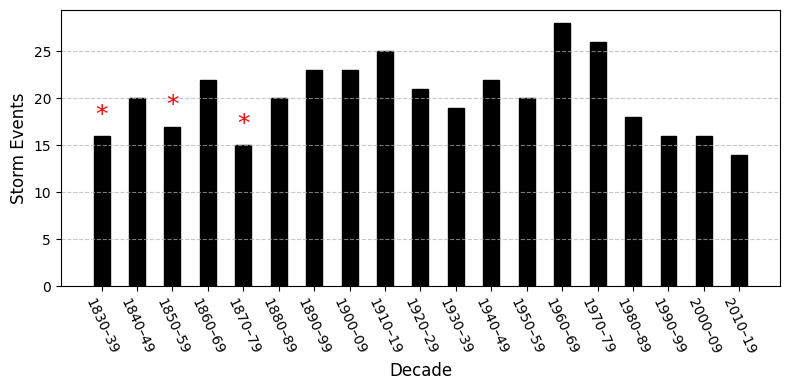

In [15]:
Winter_Storms_Bar = Storms_P[['Date','Rainfall']]
Winter_Storms_Bar = Winter_Storms_Bar.reset_index().drop_duplicates(subset='Storm ID').set_index('Date')



# Assume Winter_Storms_Bar['Year'] exists
years = Winter_Storms_Bar.loc[:'2019'].index.year


# Create 5-year bins starting from 1830
decade_bins = 10 * ((years - 1830) // 10) + 1830
Winter_Storms_Bar.loc[:'2019','Decade_Bin'] = decade_bins

# Group by bins and count storms
counts = Winter_Storms_Bar.loc[:'2019'].groupby('Decade_Bin')['Storm ID'].count()
counts.index = counts.index.astype(int)
counts = counts.sort_index()

# List of years where data is missing
missing_years = [1830, 1850, 1870]
missing_bins = [10 * ((y - 1830) // 10) + 1830 for y in missing_years]


# Plot
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(counts.index, counts.values, width=4.5, color='black', edgecolor='black')

# Add asterisk for missing bins
for missing in missing_bins:
    if missing in counts.index:
        bar = bars[counts.index.get_loc(missing)]
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, '*',
                ha='center', va='bottom', fontsize=18, color='red')

# Formatting
ax.set_xlabel('Decade', fontsize=12)
ax.set_ylabel('Storm Events', fontsize=12)
ax.set_xticks(counts.index)
ax.set_xticklabels(
    [f"{int(start)}–{((int(start) + 9) % 100):02d}" for start in counts.index],
    rotation=-65, ha='center'
)
# Optional grid and layout
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\F8_Winter_Storms.png", dpi=300, bbox_inches='tight')
fig.savefig(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Figure files\Direct From Script\F8_Winter_Storms.png", dpi=300, bbox_inches='tight')
counts = counts.to_frame()
#counts.to_csv(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Manuscript files\Storms_By_Decade.csv")

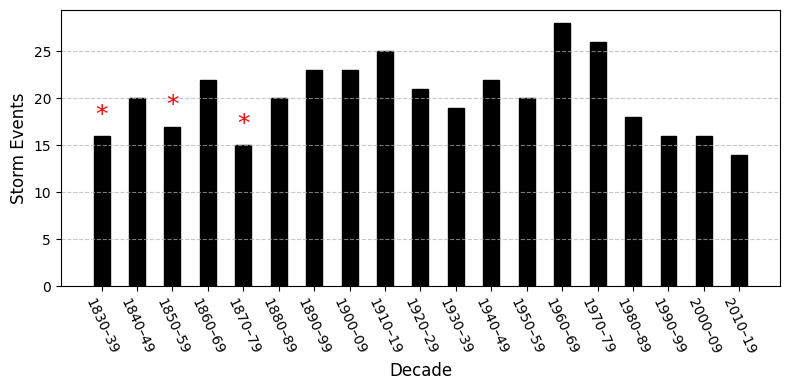

In [16]:
Winter_Storms_Bar = Storms_P[['Date','Rainfall']]
Winter_Storms_Bar = Winter_Storms_Bar.reset_index().drop_duplicates(subset='Storm ID').set_index('Date')



# Assume Winter_Storms_Bar['Year'] exists
years = Winter_Storms_Bar.loc[:'2019'].index.year


# Create 5-year bins starting from 1830
decade_bins = 10 * ((years - 1830) // 10) + 1830
Winter_Storms_Bar.loc[:'2019','Decade_Bin'] = decade_bins

# Group by bins and count storms
counts = Winter_Storms_Bar.loc[:'2019'].groupby('Decade_Bin')['Storm ID'].count()
counts.index = counts.index.astype(int)
counts = counts.sort_index()

# List of years where data is missing
missing_years = [1830, 1850, 1870]
missing_bins = [10 * ((y - 1830) // 10) + 1830 for y in missing_years]


# Plot
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(counts.index, counts.values, width=4.5, color='black', edgecolor='black')

# Add asterisk for missing bins
for missing in missing_bins:
    if missing in counts.index:
        bar = bars[counts.index.get_loc(missing)]
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, '*',
                ha='center', va='bottom', fontsize=18, color='red')

# Formatting
ax.set_xlabel('Decade', fontsize=12)
ax.set_ylabel('Storm Events', fontsize=12)
ax.set_xticks(counts.index)
ax.set_xticklabels(
    [f"{int(start)}–{((int(start) + 9) % 100):02d}" for start in counts.index],
    rotation=-65, ha='center'
)
# Optional grid and layout
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\F8_Winter_Storms.png", dpi=300, bbox_inches='tight')
fig.savefig(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Figure files\Direct From Script\F8_Winter_Storms.png", dpi=300, bbox_inches='tight')
counts = counts.to_frame()

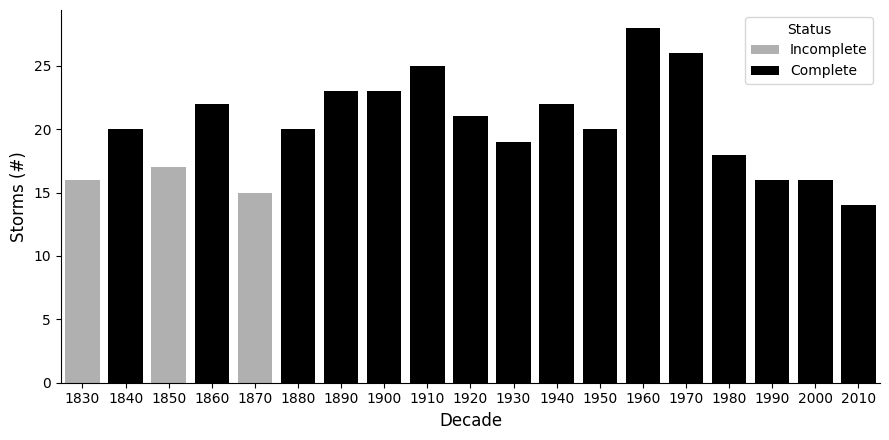

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert counts to a DataFrame for seaborn
df_counts = counts.reset_index()
df_counts.columns = ["Decade", "Storms"]

# Mark which bins are incomplete
df_counts["Status"] = df_counts["Decade"].apply(
    lambda x: "Incomplete" if x in missing_bins else "Complete"
)

# Plot
plt.figure(figsize=(9, 4.5))
sns.barplot(
    data=df_counts,
    x="Decade",
    y="Storms",
    hue="Status",        # lets us color by completeness
    dodge=False,         # keep bars side-by-side stacked
    palette={"Complete": "black", "Incomplete": "#B0B0B0"}
)

# Labels and formatting
#plt.title("Winter Storm Events", fontsize=14, weight="bold")
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Storms (#)", fontsize=12)

plt.xticks(rotation=0)

# Tidy up legend
#plt.legend(title="", loc="upper right")

sns.despine()
plt.tight_layout()
plt.show()


C:\Users\jarra\AppData\Local\Temp\ipykernel_31212\4266392028.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


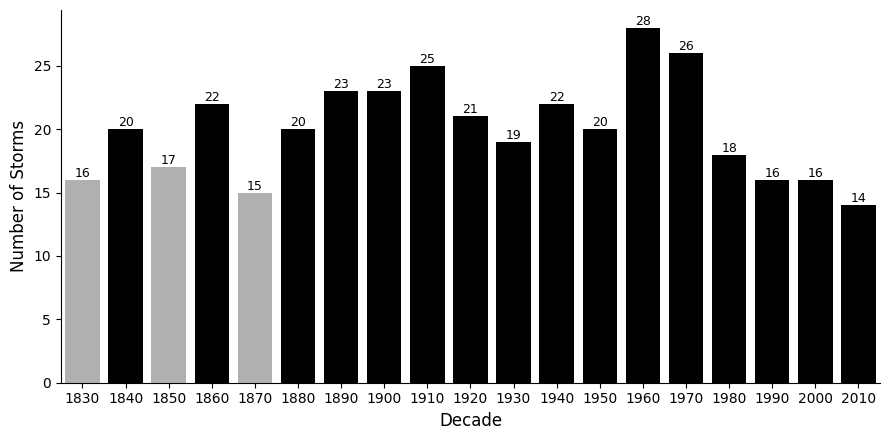

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert counts to a DataFrame for seaborn
df_counts = counts.reset_index()
df_counts.columns = ["Decade", "Storms"]

# Mark which bins are incomplete
df_counts["Status"] = df_counts["Decade"].apply(
    lambda x: "Incomplete" if x in missing_bins else "Complete"
)

# Define palette: black for complete, lighter grey for incomplete
palette = {"Complete": "black", "Incomplete": "#B0B0B0"}

# Plot (store fig and ax explicitly)
fig, ax = plt.subplots(figsize=(9, 4.5))
sns.barplot(
    data=df_counts,
    x="Decade",
    y="Storms",
    hue="Status",
    dodge=False,
    palette=palette,
    ax=ax
)

# Labels and formatting
ax.set_xlabel("Decade", fontsize=12)
ax.set_ylabel("Number of Storms", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Remove the legend completely
ax.get_legend().remove()

# Add horizontal grid lines (parallel to x-axis)
#ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.xaxis.grid(False)  # keep only horizontal lines

# Add text labels on top of bars, skip empty ones
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only label non-empty bars
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, color="black"
        )

sns.despine()
fig.tight_layout()

# ✅ Save using the figure object BEFORE show()
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\F8_Winter_Storms.png", dpi=300, bbox_inches='tight')
fig.savefig(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Figure files\Direct From Script\F8_Winter_Storms.png", dpi=300, bbox_inches='tight')

plt.show()


In [19]:
df_counts

Decade  Storms      Status
0     1830      16  Incomplete
1     1840      20    Complete
2     1850      17  Incomplete
3     1860      22    Complete
4     1870      15  Incomplete
5     1880      20    Complete
6     1890      23    Complete
7     1900      23    Complete
8     1910      25    Complete
9     1920      21    Complete
10    1930      19    Complete
11    1940      22    Complete
12    1950      20    Complete
13    1960      28    Complete
14    1970      26    Complete
15    1980      18    Complete
16    1990      16    Complete
17    2000      16    Complete
18    2010      14    Complete

# 5. Percetange Change Overtime

In [23]:
# Optional: compute mean changes
old_mean = (Winter_Storms_Bar['Storm ID'].loc['1880':'1909'].count())/(1909 - 1880 + 1) #1880-1909
new_mean = (Winter_Storms_Bar['Storm ID'].loc['1995':'2024'].count())/(2024 - 1995 + 1) #1995-2024 
percentage_change = ((new_mean - old_mean) / old_mean) * 100
percentage_change
x = f"Percentage change in storm count (1995->2024/1880->1909): {percentage_change:.1f}%"


# Optional: compute mean changes
old_mean = (Winter_Storms_Bar['Storm ID'].loc['1880':'1909'].count())/(1909 - 1880 + 1) #1880-1909
new_mean = (Winter_Storms_Bar['Storm ID'].loc['1990':'2019'].count())/(2019 - 1990 + 1) #1990-2019 
percentage_change = ((new_mean - old_mean) / old_mean) * 100
percentage_change
y = f"Percentage change in storm count (1990->2019/1880->1909): {percentage_change:.1f}%"

# Optional: compute mean changes
old_mean = (Winter_Storms_Bar['Storm ID'].loc['1900':'1969'].count())/(1969 - 1900 + 1) #1880-1909
new_mean = (Winter_Storms_Bar['Storm ID'].loc['1970':'2024'].count())/(2024 - 1970 + 1) #1990-2019 
percentage_change = ((new_mean - old_mean) / old_mean) * 100
percentage_change
a = f"Percentage change in storm count (1970->2024/1900->1969): {percentage_change:.1f}%"

# Optional: compute mean changes
old_mean = (Winter_Storms_Bar['Storm ID'].loc['1900':'1929'].count())/(1929 - 1900 + 1) #1880-1909
new_mean = (Winter_Storms_Bar['Storm ID'].loc['1970':'2024'].count())/(2024 - 1970 + 1) #1990-2019 
percentage_change = ((new_mean - old_mean) / old_mean) * 100
percentage_change
b = f"Percentage change in storm count (1970->2024/1900->1929): {percentage_change:.1f}%"


# Optional: compute mean changes
old_mean = (Winter_Storms_Bar['Storm ID'].loc['1880':'1909'].count())/(1909 - 1880 + 1) #1880-1909
new_mean = (Winter_Storms_Bar['Storm ID'].loc['1970':'2024'].count())/(2024 - 1970 + 1) #1990-2019 
percentage_change = ((new_mean - old_mean) / old_mean) * 100
c = f"Percentage change in storm count (1970->2024/1880->1909): {percentage_change:.1f}%"

# Optional: compute mean changes
old_mean = (Winter_Storms_Bar['Storm ID'].loc['1850':'1900'].count())/(1900 - 1850 + 1) #1880-1909
new_mean = (Winter_Storms_Bar['Storm ID'].loc['1990':'2019'].count())/(2019 - 1990 + 1) #1990-2019 
percentage_change = ((new_mean - old_mean) / old_mean) * 100
d = f"Percentage change in storm count (1990->2019/1850->1900): {percentage_change:.1f}%"

# Optional: compute mean changes
old_mean = (Winter_Storms_Bar['Storm ID'].loc['1850':'1900'].count())/(1900 - 1850 + 1) #1880-1909
new_mean = (Winter_Storms_Bar['Storm ID'].loc['1995':'2024'].count())/(2024 - 1995 + 1) #1990-2019 
percentage_change = ((new_mean - old_mean) / old_mean) * 100
e = f"Percentage change in storm count (1995->2024/1850->1900): {percentage_change:.1f}%"

# Optional: compute mean changes
old_mean = (Winter_Storms_Bar['Storm ID'].loc['1865':'1900'].count())/(1900 - 1865 + 1) #1880-1909
new_mean = (Winter_Storms_Bar['Storm ID'].loc['1995':'2024'].count())/(2024 - 1995 + 1) #1990-2019 
percentage_change = ((new_mean - old_mean) / old_mean) * 100
f = f"Percentage change in storm count (1995->2024/1865->1900): {percentage_change:.1f}%"


# Optional: compute mean changes
old_mean = (Winter_Storms_Bar['Storm ID'].loc['1865':'1900'].count())/(1900 - 1865 + 1) #1880-1909
new_mean = (Winter_Storms_Bar['Storm ID'].loc['1990':'2019'].count())/(2019 - 1990 + 1) #1990-2019 
percentage_change = ((new_mean - old_mean) / old_mean) * 100
g = f"Percentage change in storm count (1990->2019/1865->1900): {percentage_change:.1f}%"


X = [x,y,a,b,c,d,e,f,g]
X = pd.DataFrame(X, columns=['Percentage Change'])

counts.to_csv(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Manuscript files\Storms_By_Half_Decade.csv")
X.to_csv(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Manuscript files\Storms_%.csv")
# Convert list to DataFrame
print(x)
print(y)
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)




Percentage change in storm count (1995->2024/1880->1909): -24.2%
Percentage change in storm count (1990->2019/1880->1909): -30.3%
Percentage change in storm count (1970->2024/1900->1969): -21.1%
Percentage change in storm count (1970->2024/1900->1929): -22.5%
Percentage change in storm count (1970->2024/1880->1909): -19.0%
Percentage change in storm count (1990->2019/1850->1900): -24.1%
Percentage change in storm count (1995->2024/1850->1900): -17.5%
Percentage change in storm count (1995->2024/1865->1900): -18.9%
Percentage change in storm count (1990->2019/1865->1900): -25.4%


In [24]:
# Optional: compute mean changes
old_mean = (Winter_Storms_Bar['Storm ID'].loc['1880':'1969'].count())/(1969 - 1880 + 1) #1880-1909
new_mean = (Winter_Storms_Bar['Storm ID'].loc['1990':'2024'].count())/(2024 - 1990 + 1) #1995-2024 
percentage_change = ((new_mean - old_mean) / old_mean) * 100
percentage_change
x = f"Percentage change in storm count (1990->2024/1880->1969): {percentage_change:.1f}%"


# Optional: compute mean changes
old_mean = (Winter_Storms_Bar['Storm ID'].loc['1880':'1969'].count())/(1969 - 1880 + 1) #1880-1909
new_mean = (Winter_Storms_Bar['Storm ID'].loc['1970':'2024'].count())/(2024 - 1970 + 1) #1995-2024 
percentage_change = ((new_mean - old_mean) / old_mean) * 100
percentage_change
y = f"Percentage change in storm count (1970->2024/1880->1969): {percentage_change:.1f}%"
print(x)
print(y)


Percentage change in storm count (1990->2024/1880->1969): -30.9%
Percentage change in storm count (1970->2024/1880->1969): -20.2%


# 6. CAPE LEEUWIN STORM EVENTS

In [25]:
Potential_CL,Storms_CL,Extreme_CL,NANS_CL = Storm_Finder_v3(CL_MSLP_SD,[6,7,8], Tendency = True, Rainfall_Received = False, Raindays= [], Rainfall= [],Rainfall_Target=0)

In [26]:
Potential_CL

Date 9am MSLP (hPa) 3pm MSLP (hPa) 9am+1d MSLP (hPa)
Storm ID                                                           
1        1907-06-19         1002.8         1000.8            1019.1
2        1907-07-31          991.8          996.4            1013.9
3        1907-08-09         1009.7         1014.1             999.1
3        1907-08-10          999.1         1009.3            1012.0
4        1907-08-18         1000.6         1007.2            1017.0
...             ...            ...            ...               ...
370      2022-08-03          994.2          998.2            1013.0
371      2022-08-12         1020.6         1015.4            1003.2
371      2022-08-13         1003.2         1001.9            1017.1
372      2023-08-02         1006.2         1009.5            1025.4
373      2024-08-22         1005.4          995.7            1003.2

[432 rows x 4 columns]

In [27]:
CL_EWS =Potential_CL.set_index('Date')
P_EWS =Storms_P.set_index('Date')


CL_EWS = CL_EWS.rename(columns = {'9am MSLP (hPa)':'CL 9am MSLP (hPa)'})
P_EWS=P_EWS.rename(columns = {'9am MSLP (hPa)':'P 9am MSLP (hPa)'})
CL_EWS = CL_EWS.rename(columns = {'3pm MSLP (hPa)':'CL 3pm MSLP (hPa)'})
P_EWS=P_EWS.rename(columns = {'3pm MSLP (hPa)':'P 3pm MSLP (hPa)'})
P_EWS=P_EWS.rename(columns = {'Rainfall':'Perth Rainfall (mm)'})

Storms_In_Two_Places = pd.merge(P_EWS, CL_EWS, how='inner', left_index=True, right_index=True)
Storms_In_Two_Places['9am P - CL'] = Storms_In_Two_Places['P 9am MSLP (hPa)'] - Storms_In_Two_Places['CL 9am MSLP (hPa)']
Storms_In_Two_Places['3pm P - CL'] = Storms_In_Two_Places['P 3pm MSLP (hPa)'] - Storms_In_Two_Places['CL 3pm MSLP (hPa)']

#Find the time between storms again
Storms_In_Two_Places['Days between Storms'] = Storms_In_Two_Places.index.diff().days
        
# Identify new groups where the difference is not 1 day
Storms_In_Two_Places['Storm ID'] = (Storms_In_Two_Places['Days between Storms'] > 1).cumsum()+1

#Now 372 IDs for the storms with 0 and 1 days counted #Now we want to capture the id list
Storms_ID_List = Storms_In_Two_Places[Storms_In_Two_Places['Perth Rainfall (mm)'] >= 25][['Storm ID']]
Storms_ID_List = Storms_ID_List.drop_duplicates(subset='Storm ID')


Extreme_Storms_In_Two_Places = Storms_In_Two_Places.reset_index().merge(Storms_ID_List, how='inner', left_on='Storm ID', right_on='Storm ID').set_index('Date')
   
Extreme_Storms_In_Two_Places['Days between Storms'] = Extreme_Storms_In_Two_Places.index.diff().days
Extreme_Storms_In_Two_Places['Storm ID'] = (Extreme_Storms_In_Two_Places['Days between Storms'] > 1).cumsum()+1
#ChatJR.save_to_word(Extreme_Storms_In_Two_Places,r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Manuscript files\Storms\Cape_Leeuwin_Perth_Storms_List_1907_2024.docx")
Extreme_Storms_In_Two_Places[['Storm ID','P 9am MSLP (hPa)','P 3pm MSLP (hPa)','CL 9am MSLP (hPa)','CL 3pm MSLP (hPa)','9am P - CL','3pm P - CL','Perth Rainfall (mm)']]

Storm ID P 9am MSLP (hPa) P 3pm MSLP (hPa) CL 9am MSLP (hPa)  \
Date                                                                       
1907-07-31         1            996.0            998.0             991.8   
1909-08-18         2           1013.7           1017.7            1014.8   
1913-07-17         3           1008.0           1009.0            1006.2   
1922-06-07         4           1002.4           1010.0            1008.0   
1927-06-17         5            995.5            991.1             992.4   
1927-06-29         6           1008.3           1013.0            1005.2   
1928-07-16         7           1008.7            999.4            1011.8   
1933-07-25         8           1003.2           1010.5             995.9   
1935-07-09         9            995.1            999.6             994.2   
1935-07-18        10           1001.7           1007.4             996.6   
1936-06-02        11           1000.6            999.4             998.0   
1941-07-25        12           1015.5           1013.4            1014.7   
1941-07-26        12           1002.4           1004.9             997.7   
1944-08-11        13           1007.7           1012.4            1007.4   
1946-06-20        14           1003.6           1010.0            1001.8   
1962-07-22        15           1005.2           1005.2            1002.8   
1965-06-01        16           1009.5           1013.2            1002.4   
1967-06-26        17           1012.7           1013.6             998.0   
1967-08-08        18           1006.2           1005.4            1004.9   
1973-06-12        19           1001.3           1002.5            1002.6   
1973-07-24        20              NaN           1005.4            1004.6   
1976-08-07        21           1003.8           1008.5             990.4   
1976-08-15        22           1012.0           1016.7            1008.7   
1983-06-17        23           1008.2            999.5            1004.2   
1988-07-24        24           1004.7           1003.3            1000.1   
1995-06-08        25            998.7            999.7             993.1   
1998-06-08        26           1001.8           1006.8             994.1   
2001-07-30        27           1011.7           1013.6            1008.4   
2003-08-11        28            997.7           1001.9             996.8   
2005-08-17        29           1010.6           1006.7            1007.3   
2006-08-15        30           1007.0           1008.4             999.9   
2015-06-21        31           1006.8           1008.1            1002.9   

           CL 3pm MSLP (hPa) 9am P - CL 3pm P - CL  Perth Rainfall (mm)  
Date                                                                     
1907-07-31             996.4        4.2        1.6                 31.2  
1909-08-18            1021.5       -1.1       -3.8                 35.8  
1913-07-17            1008.6        1.8        0.4                 30.2  
1922-06-07            1014.5       -5.6       -4.5                 31.8  
1927-06-17             982.6        3.1        8.5                 46.5  
1927-06-29            1013.2        3.1       -0.2                 38.1  
1928-07-16             998.0       -3.1        1.4                 29.7  
1933-07-25            1007.9        7.3        2.6                 25.7  
1935-07-09            1001.4        0.9       -1.8                 32.8  
1935-07-18            1005.3        5.1        2.1                 30.7  
1936-06-02             998.7        2.6        0.7                 35.6  
1941-07-25            1013.4        0.8        0.0                  4.8  
1941-07-26            1002.2        4.7        2.7                 25.7  
1944-08-11            1014.3        0.3       -1.9                 41.7  
1946-06-20            1008.8        1.8        1.2                 34.5  
1962-07-22            1006.1        2.4       -0.9                 29.7  
1965-06-01            1010.2        7.1        3.0                 32.0  
1967-06-26           

# 7. PERCETANGE OF RAINFALL FOR THE STORMS

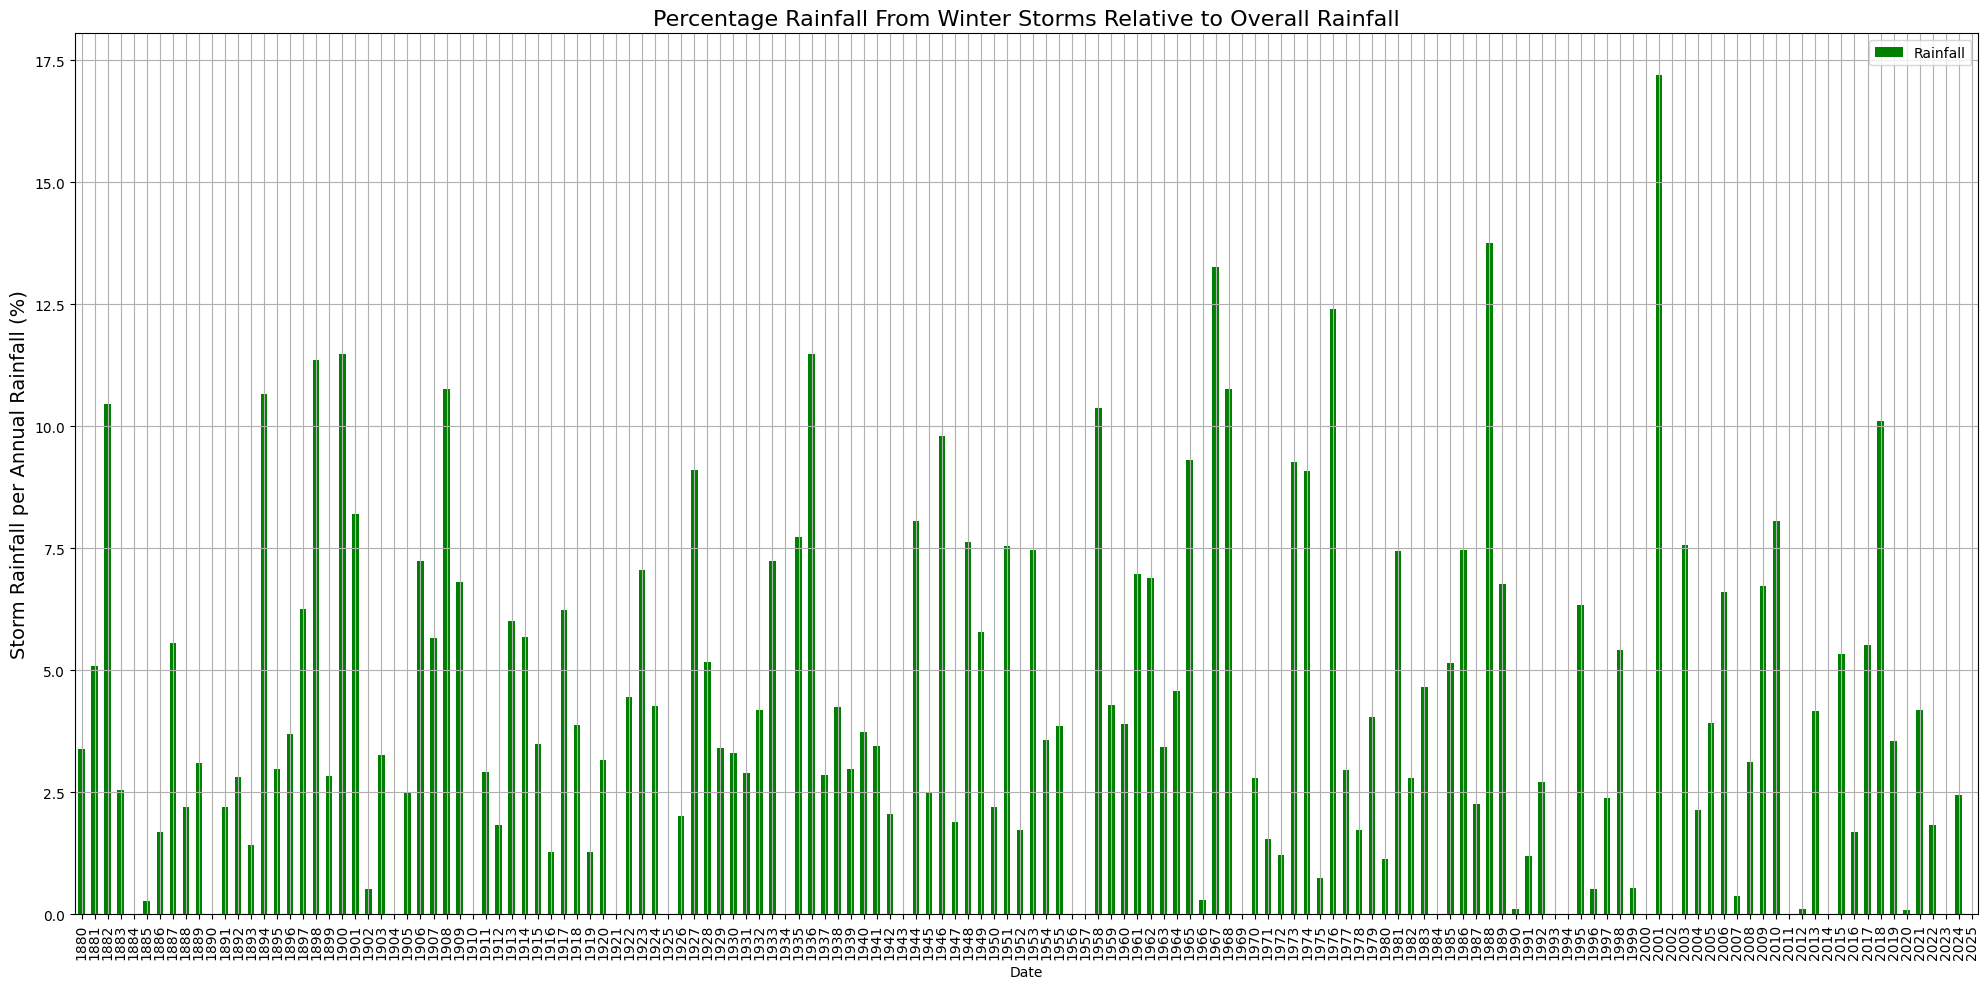

Rainfall    4.203533
dtype: float64

In [28]:
#Get the date out and sum yearly rainfall from storms
Storms_P_FR = Storms_P.reset_index().set_index('Date')
Storms_P_FR = Storms_P_FR[['Rainfall']].dropna()
Storms_P_FR
Storms_P_FR = Storms_P_FR.resample('YS').sum()

Storms_P_FR.index = Storms_P_FR.index.year
#Get sum of total rainfall
P_RF_Y = P_RF.resample('YS').sum()
P_RF_Y = P_RF_Y.loc['1880':].rename(columns = {'RAINFALL':'Rainfall'})
P_RF_Y.index = P_RF_Y.index.year

fig, ax = plt.subplots(figsize=(20, 10))
((Storms_P_FR / P_RF_Y) * 100).plot(kind='bar', ax=ax, color='green')
ax.set_ylabel('Storm Rainfall per Annual Rainfall (%)', fontsize=14)
ax.set_title('Percentage Rainfall From Winter Storms Relative to Overall Rainfall', fontsize=16)
ax.tick_params(axis='x', rotation=90)
ax.grid(True)

plt.tight_layout()
plt.show()
((Storms_P_FR/ P_RF_Y) * 100).mean()

# 8. IDENTIFY THE BOM/CSIRO DECLINES 20% AND 24%, 1970 AND 1994


In [29]:
P_RF_May_Jul = ChatJR.filter_dataframe_by_months(P_RF, [5,6,7]).resample('YS').sum()
P_RF_Jun_Aug = ChatJR.filter_dataframe_by_months(P_RF, [6,7,8]).resample('YS').sum()
P_RF_Apr_Oct = ChatJR.filter_dataframe_by_months(P_RF, [4,5,6,7,8,9,10]).resample('YS').sum()

In [30]:
#MAY - JUL
new_mean = P_RF_May_Jul.loc['1970':].mean()
old_mean = P_RF_May_Jul.loc['1900':'1969'].mean()
print(((new_mean - old_mean) / old_mean) * 100)


#MAY - OCT
new_mean = P_RF_Apr_Oct.loc['1970':].mean()
old_mean = P_RF_Apr_Oct.loc['1900':'1969'].mean()
print(((new_mean - old_mean) / old_mean) * 100)


#MAY - JUL
new_mean = P_RF_May_Jul.loc['1994':].mean()
old_mean = P_RF_May_Jul.loc['1900':'1969'].mean()
print(((new_mean - old_mean) / old_mean) * 100)

RAINFALL   -22.223065
dtype: float64
RAINFALL   -19.044128
dtype: float64
RAINFALL   -28.351138
dtype: float64


In [31]:
#JUN - AUG


print('1970-2024/1900-1969')
new_mean = P_RF_Jun_Aug.loc['1970':].mean()
old_mean =P_RF_Jun_Aug.loc['1900':'1969'].mean()
print(((new_mean - old_mean) / old_mean) * 100)

print('1994-2024/1900-1969')
new_mean = P_RF_Jun_Aug.loc['1994':].mean()
old_mean =P_RF_Jun_Aug.loc['1900':'1969'].mean()
print(((new_mean - old_mean) / old_mean) * 100)


print('1994-2024/1900-1994')
new_mean = P_RF_Jun_Aug.loc['1994':].mean()
old_mean =P_RF_Jun_Aug.loc['1900':'1994'].mean()
print(((new_mean - old_mean) / old_mean) * 100)


print('1995-2024/1880-1909')
new_mean = P_RF_Jun_Aug.loc['1995':].mean()
old_mean =P_RF_Jun_Aug.loc['1880':'1909'].mean()
print(((new_mean - old_mean) / old_mean) * 100)


print('1995-2024/1900-1929')
new_mean = P_RF_Jun_Aug.loc['1995':].mean()
old_mean =P_RF_Jun_Aug.loc['1900':'1929'].mean()
print(((new_mean - old_mean) / old_mean) * 100)


print('1994-2024/1900-1929')
new_mean = P_RF_Jun_Aug.loc['1994':].mean()
old_mean =P_RF_Jun_Aug.loc['1900':'1929'].mean()
print(((new_mean - old_mean) / old_mean) * 100)


print('1994-2024/1880-1909')
new_mean = P_RF_Jun_Aug.loc['1994':].mean()
old_mean =P_RF_Jun_Aug.loc['1880':'1909'].mean()
print(((new_mean - old_mean) / old_mean) * 100)


print('1970-2024/1900-1929')
new_mean = P_RF_Jun_Aug.loc['1970':].mean()
old_mean =P_RF_Jun_Aug.loc['1900':'1929'].mean()
print(((new_mean - old_mean) / old_mean) * 100)


print('1970-2024/1880-1909')
new_mean = P_RF_Jun_Aug.loc['1970':].mean()
old_mean =P_RF_Jun_Aug.loc['1880':'1909'].mean()
print(((new_mean - old_mean) / old_mean) * 100)




1970-2024/1900-1969
RAINFALL   -19.452178
dtype: float64
1994-2024/1900-1969
RAINFALL   -22.890336
dtype: float64
1994-2024/1900-1994
RAINFALL   -19.912849
dtype: float64
1995-2024/1880-1909
RAINFALL   -18.088843
dtype: float64
1995-2024/1900-1929
RAINFALL   -23.700385
dtype: float64
1994-2024/1900-1929
RAINFALL   -22.844073
dtype: float64
1994-2024/1880-1909
RAINFALL   -17.169552
dtype: float64
1970-2024/1900-1929
RAINFALL   -19.403852
dtype: float64
1970-2024/1880-1909
RAINFALL   -13.476316
dtype: float64


The trend is particularly strong for the period from May to July, in the earlier part of the cool season, over south-west Western Australia, with average rainfall since 1970 around 20% less than the average from 1900 to 1969. Over the full cool season from April to October, the decline in rainfall over the same period is around 16%. In the last 30 years since 1994, the decline in May to July has further strengthened to Northern wet season (October–April) rainfall deciles for the past 30 years (1994–2024). A decile map shows where rainfall is above average, average or below average for this period compared to all years from 1900 to 1993. Anomalies of October to April rainfall for northern Australia (from 26° S northwards). Anomalies are calculated with respect to the 1961–1990 average. The line shows the 11-year running mean. around 24%, despite relatively high cool season rainfall during 2021. It is highly unlikely that a decline of this magnitude could have occurred due to natural variability alone.

In [32]:
new_mean = P_RF_Jun_Aug.loc['1990':'2024'].mean()
old_mean =P_RF_Jun_Aug.loc['1900':'1969'].mean()
yy = ((new_mean - old_mean) / old_mean) * 100


new_mean = P_RF_Jun_Aug.loc['1970':'2024'].mean() #Mean winter rainfall
old_mean =P_RF_Jun_Aug.loc['1900':'1969'].mean()
xx = ((new_mean - old_mean) / old_mean) * 100


h = f"Percentage change in winter rainfall mean (1990->2024/1900->1969): {yy.values[0]:.1f}%"
g = f"Percentage change in winter rainfall mean (1970->2024/1900->1969): {xx.values[0]:.1f}%"

print(h)
print(g)

Percentage change in winter rainfall mean (1990->2024/1900->1969): -22.0%
Percentage change in winter rainfall mean (1970->2024/1900->1969): -19.3%


In [33]:
P_RF_Jun_Aug.loc['1880':'1909'].mean()

RAINFALL    480.56
dtype: float64

In [34]:
P_RF_Jun_Aug

RAINFALL
Date                
1830-01-01       0.0
1831-01-01       0.0
1832-01-01       0.0
1833-01-01       0.0
1834-01-01       0.0
...              ...
2021-01-01     421.8
2022-01-01     392.2
2023-01-01     424.4
2024-01-01     427.0
2025-01-01     386.2

[196 rows x 1 columns]

# 9. CAPE LEEUWIN AND PERTH PRESSURE DIFFERENCE

In [35]:
PRESSURE_DIFFERENCE = pd.merge(P_MSLP_SD.rename(columns = {'MSLP':'P MSLP (hPa)'}),CL_MSLP_SD.rename(columns = {'MSLP':'CL MSLP (hPa)'}), how='inner', left_index=True, right_index=True)
PRESSURE_DIFFERENCE['P - CL'] = PRESSURE_DIFFERENCE['P MSLP (hPa)'] - PRESSURE_DIFFERENCE['CL MSLP (hPa)']

#PRESSURE_DIFFERENCE.to_csv(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Data files\Stefans Pressure Difference CL P\MSLP_CL_P_Difference.csv")

# 10. 8-9 August 1909 

In [36]:
Storms_P.set_index('Date').loc['1909']


9am MSLP (hPa) 3pm MSLP (hPa) 9am+1d MSLP (hPa)  Rainfall
Date                                                                
1909-08-09         1007.6         1010.6            1024.4      31.8
1909-08-18         1013.7         1017.7            1027.1      35.8

# 11. STORM FIGURE

In [37]:
Daily_Pressure =  xr.open_dataset(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\20CR Data\Pressure\PRMSL_hPa.nc")


In [38]:
Dataset = Daily_Pressure
#Mean_Pressure_81_10 = Dataset.sel(time=slice('1961', '1990'))#.sel(time=Dataset['time'].dt.month.isin([6, 7, 8])).mean(dim='time')
#Mean_Pressure_81_10

Mean_Pressure_81_10 = Dataset.sel(time=slice('1961', '1990'))
Mean_Pressure_81_10 = Mean_Pressure_81_10.sel(time=Mean_Pressure_81_10['time'].dt.month.isin([6, 7, 8])).mean(dim='time')
Mean_Pressure_81_10


<xarray.Dataset> Size: 63kB
Dimensions:    (lat: 96, lon: 161, nbnds: 2)
Coordinates:
  * lat        (lat) float32 384B -75.0 -74.0 -73.0 -72.0 ... 18.0 19.0 20.0
  * lon        (lon) float32 644B 40.0 41.0 42.0 43.0 ... 198.0 199.0 200.0
Dimensions without coordinates: nbnds
Data variables:
    prmsl      (lat, lon) float32 62kB 1.021e+03 1.021e+03 ... 1.015e+03
    time_bnds  (nbnds) float64 16B 1.543e+06 1.543e+06

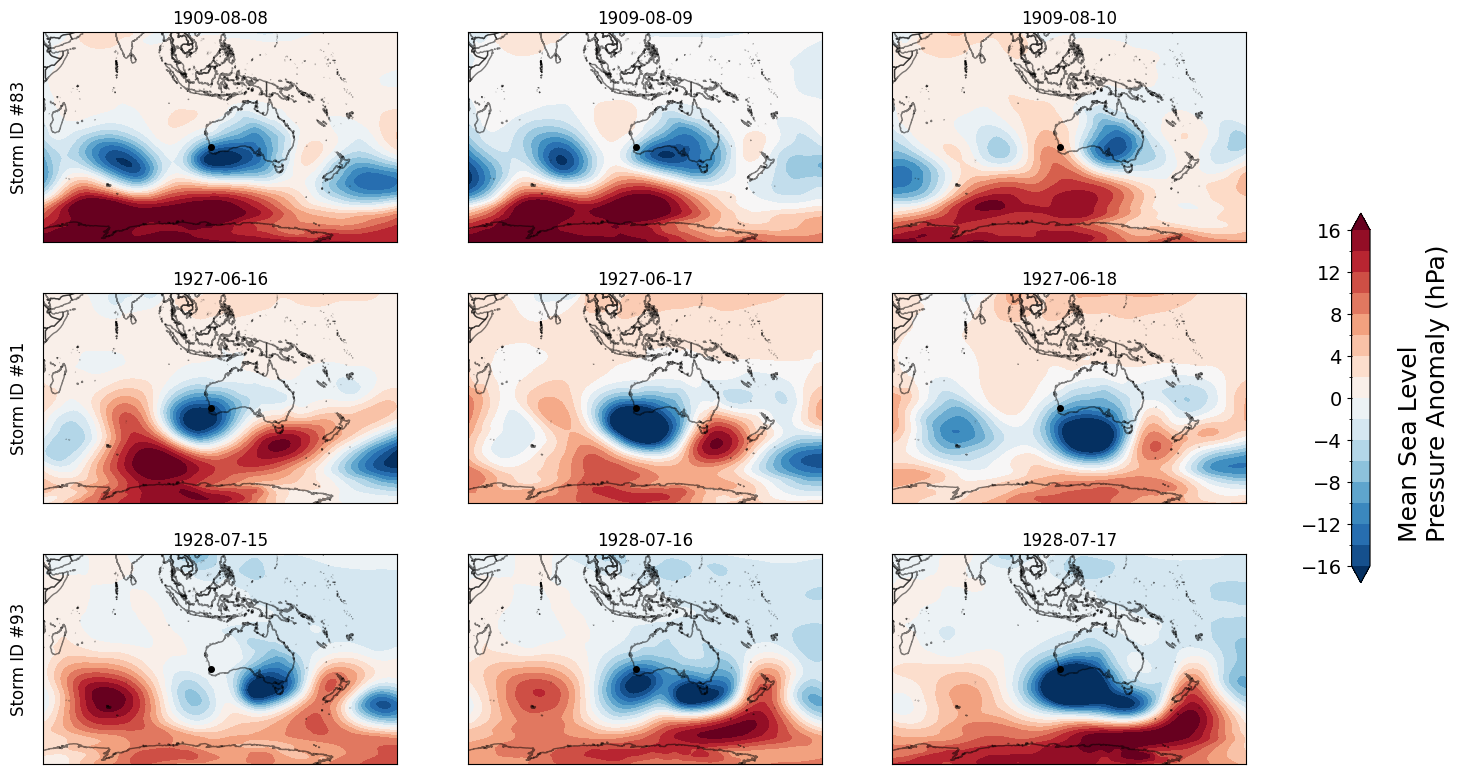

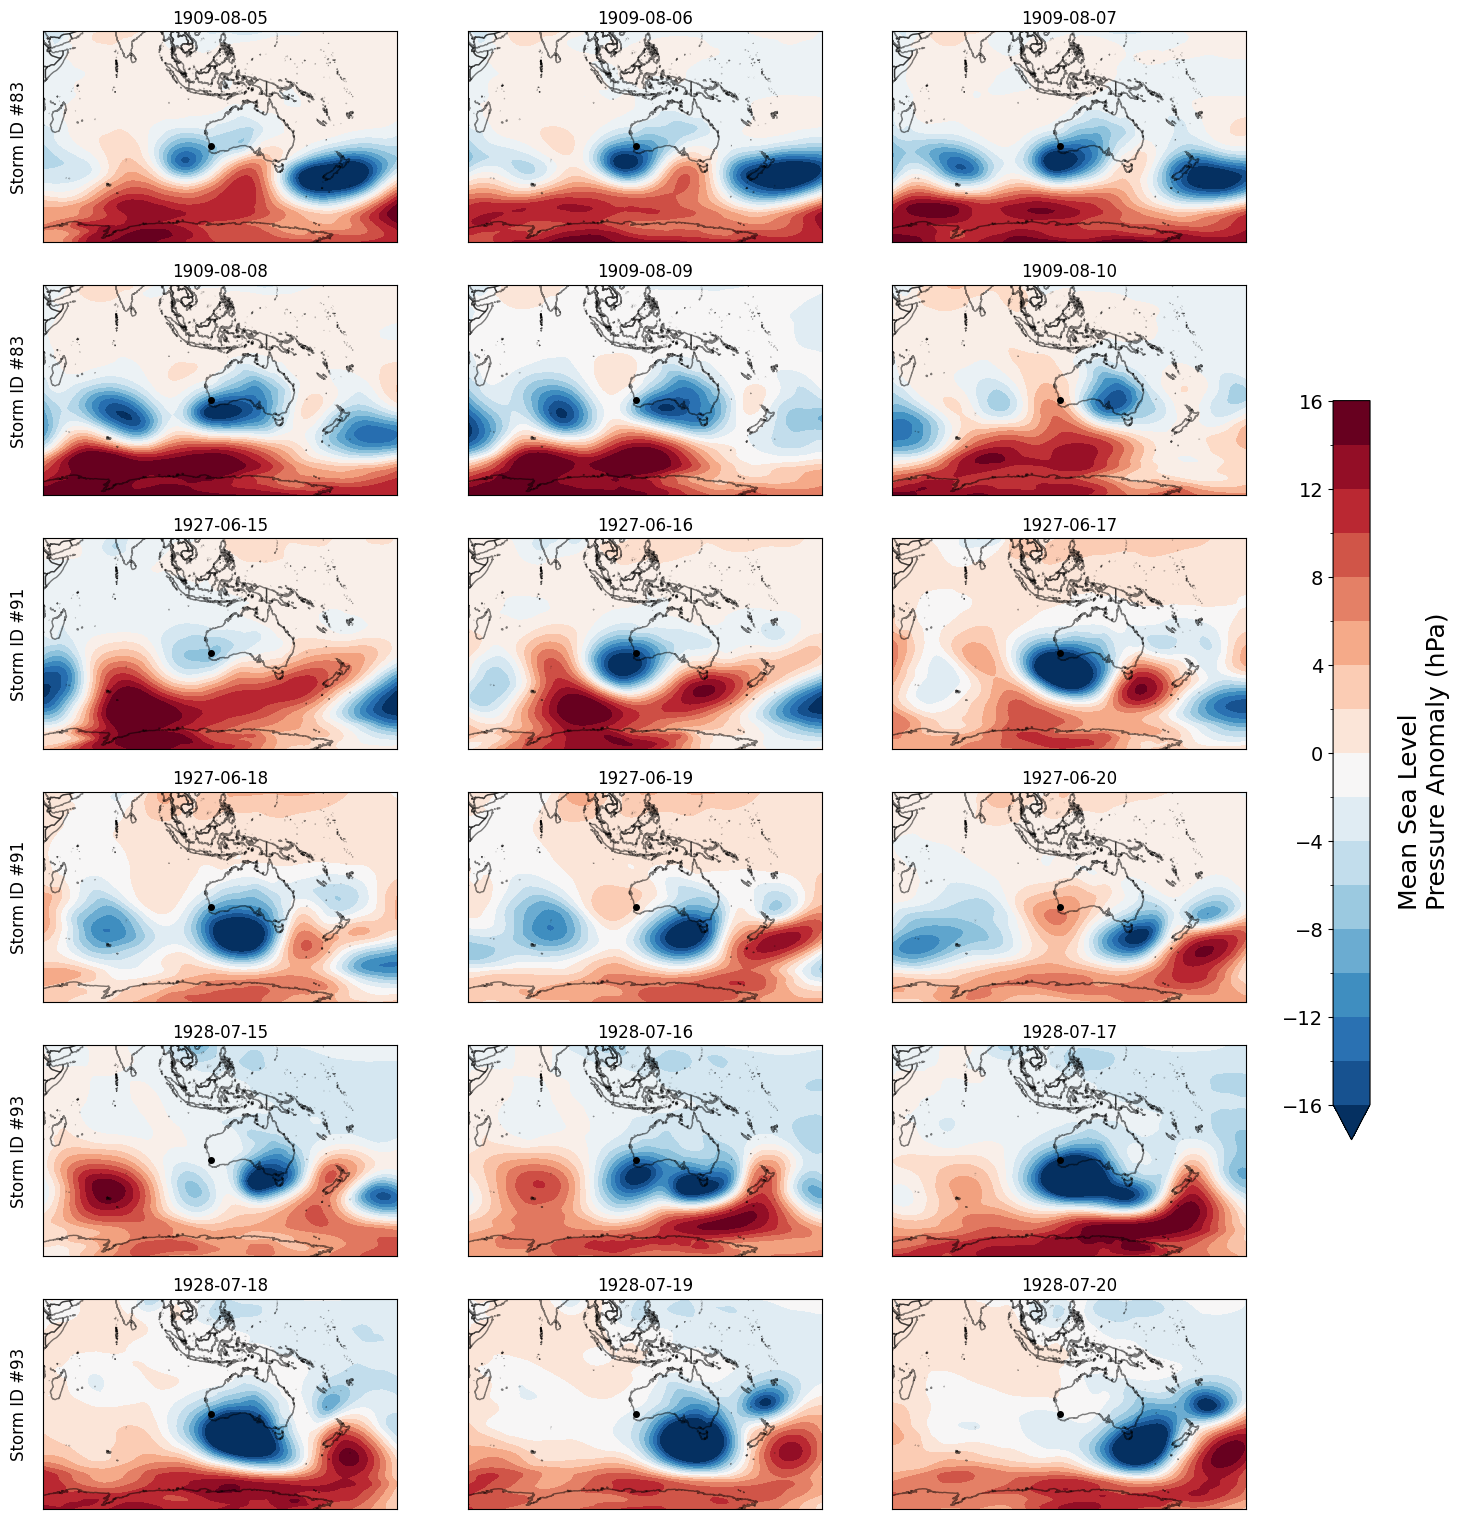

In [39]:
fig, ax = ChatJR.STORM_MSLP_ONLY(['1909-08-09',
                                  '1927-06-17',
                                  '1928-07-16',], 
                                  Daily_Pressure,
                                  ['Storm ID #83', 'Storm ID #91','Storm ID #93'])

fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\F7_20CR_Storms_61_90_JJA_Avg.png", dpi=300, bbox_inches='tight')
fig.savefig(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Figure files\Direct From Script\F7_20CR_Storms_61_90_JJA_Avg.png", dpi=300, bbox_inches='tight')


fig, ax = ChatJR.STORM_MSLP_ONLY(['1909-08-06','1909-08-09',
                                '1927-06-16','1927-06-19',
                                '1928-07-16','1928-07-19'], 
                                 Daily_Pressure,
                                 ['Storm ID #83', 'Storm ID #83','Storm ID #91','Storm ID #91','Storm ID #93','Storm ID #93'])

fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\S5_20CR_Storms_Storms_61_90_JJA_Avg.png", dpi=300, bbox_inches='tight')
fig.savefig(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Figure files\Direct From Script\S5_20CR_Storms_Storms_61_90_JJA_Avg.png", dpi=300, bbox_inches='tight')


0
1
2
3
4
5
6


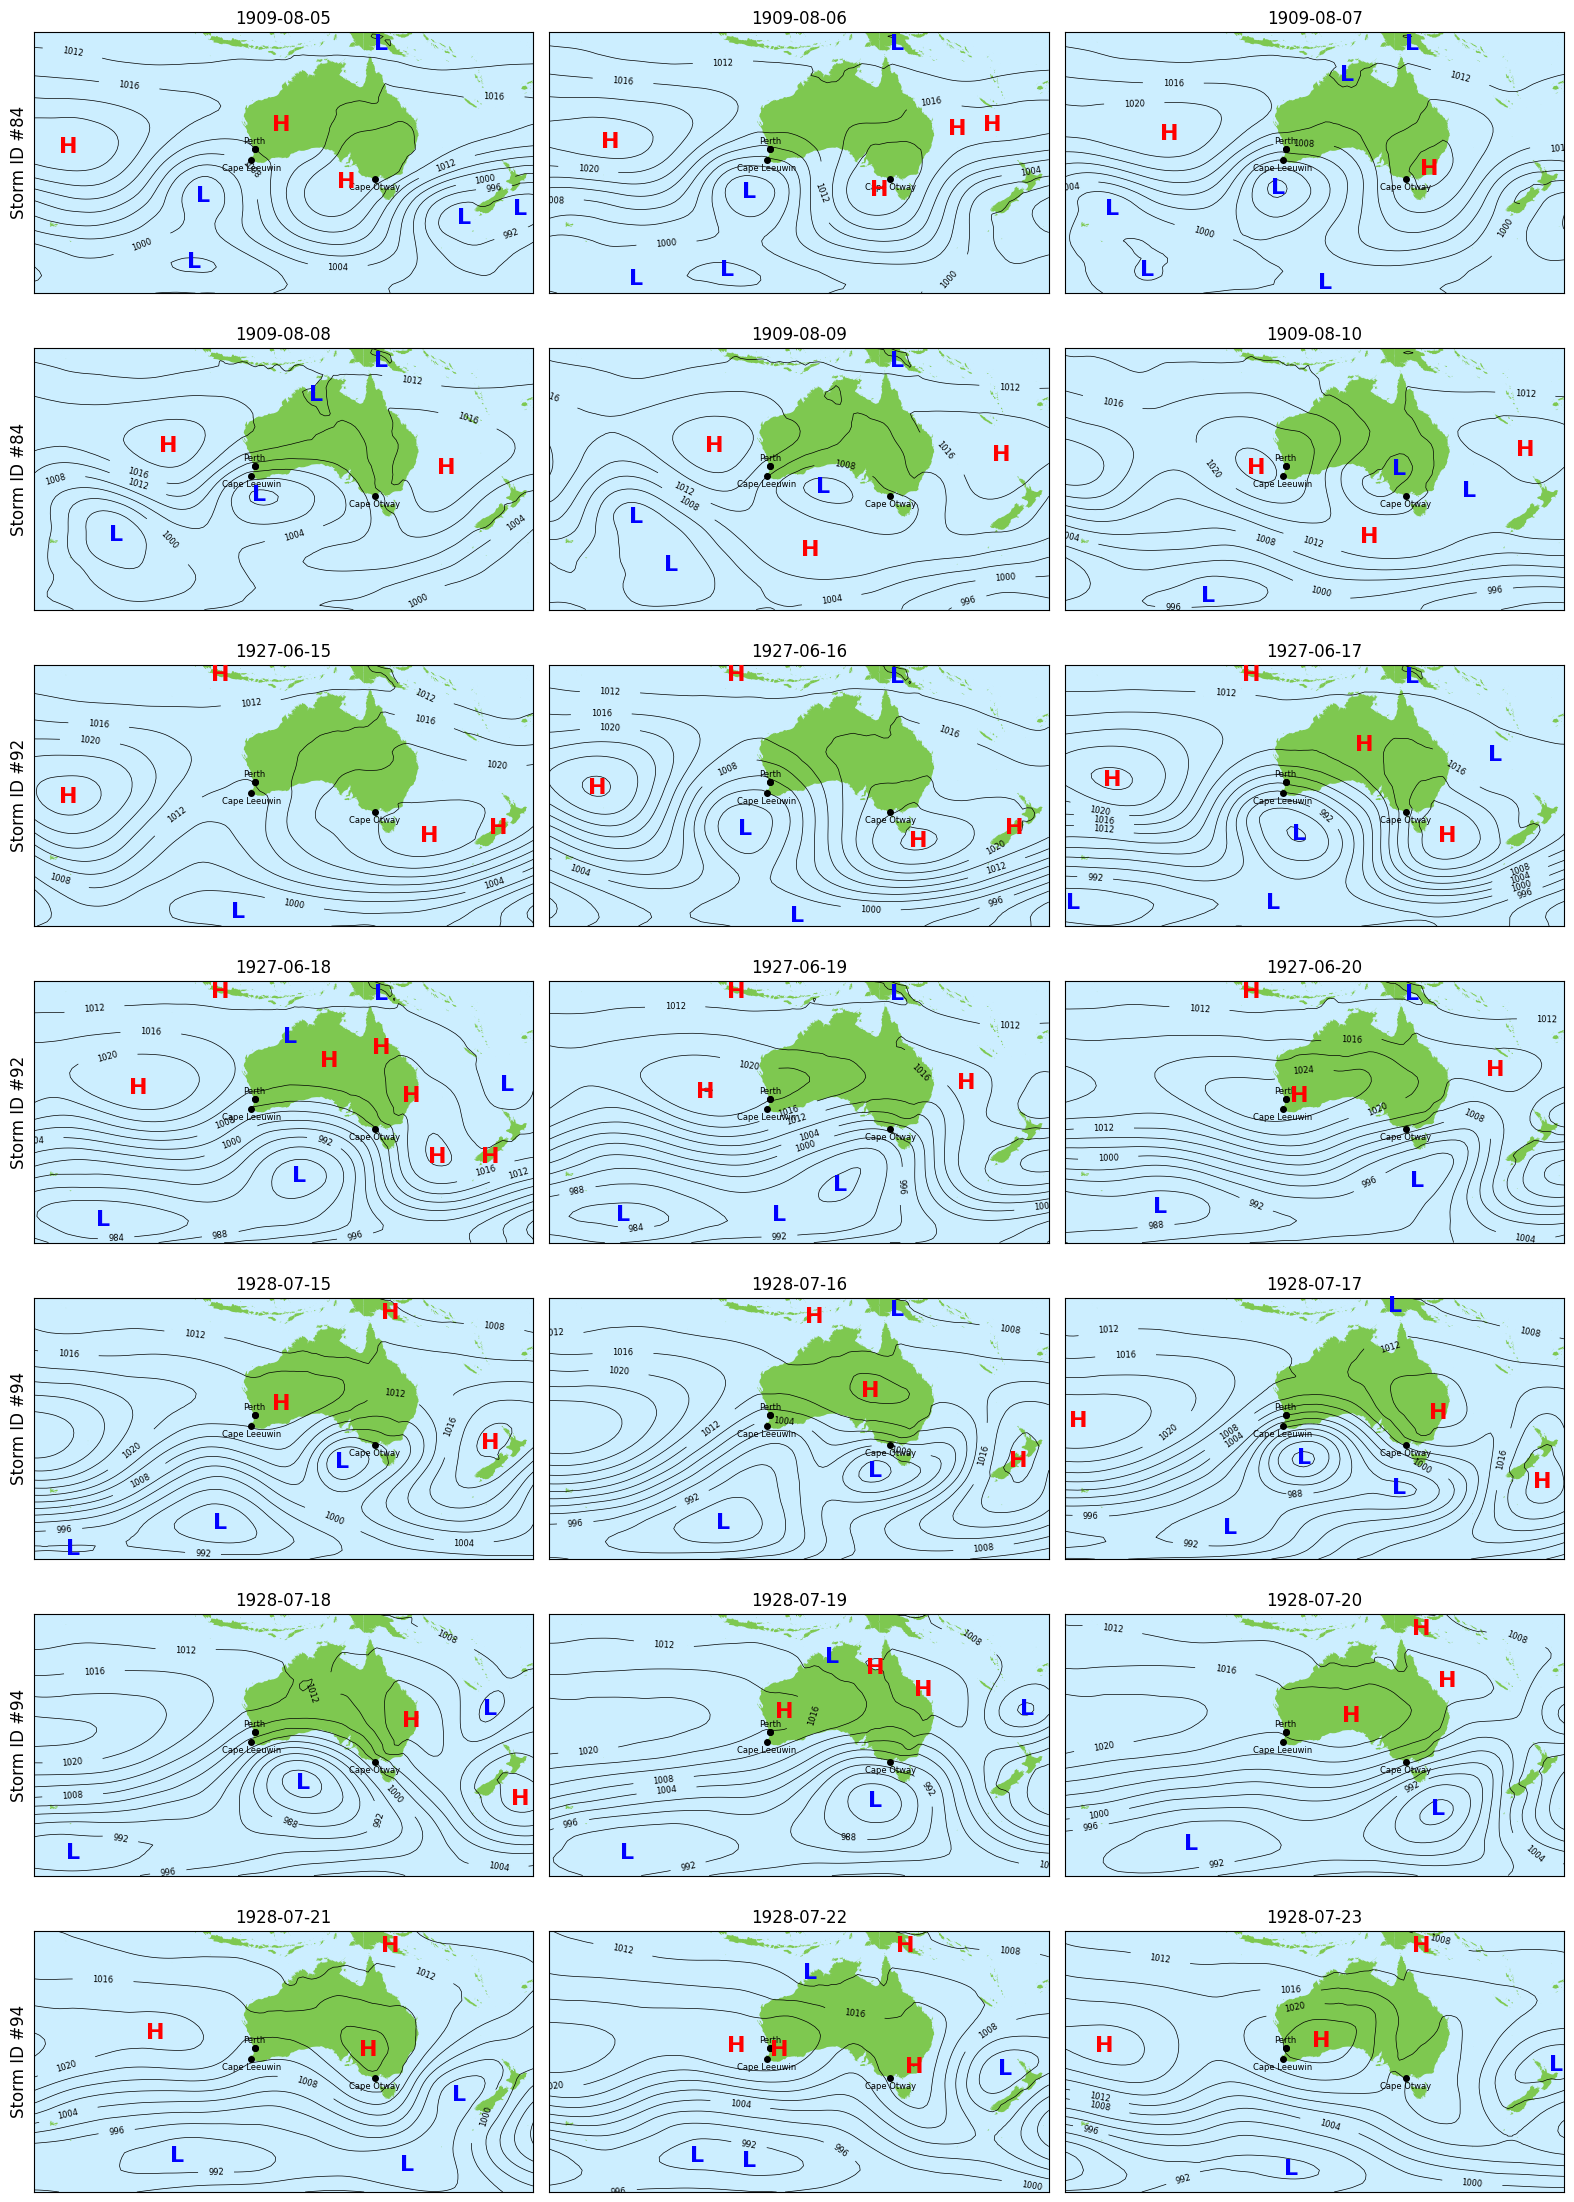

In [40]:
def STORM_MSLP_ONLY_Cont(Events_Vec, Dataset, Titles):
    import geopandas as gpd
    import matplotlib.pyplot as plt
    import numpy as np
    from datetime import datetime, timedelta
    from scipy.ndimage import minimum_filter, maximum_filter, label
    from math import hypot

    def haversine_dist(lat1, lon1, lat2, lon2):
        return hypot(lat1 - lat2, lon1 - lon2)

    # Load shapefile for background map
    borders_gdf = gpd.read_file(
        r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\Shape Files\World Shape\ne_10m_admin_0_countries.shp"
    )
    borders_gdf.crs = 'EPSG:4326'

    dot = 4
    length_events = len(Events_Vec)

    fig, ax = plt.subplots(nrows=length_events, ncols=4,
                           figsize=(21, 3.2 * length_events),
                           facecolor='white',
                           squeeze=False)  # ensures ax is always 2D

    lat_min, lat_max = -65, -5
    lon_min, lon_max = 65, 180

    P_min = Dataset.prmsl.min().item()
    P_max = Dataset.prmsl.max().item()
    P_levels = np.arange(np.floor(P_min / 4) * 4,
                         np.ceil(P_max / 4) * 4 + 4, 4)

    for event_id, event_date in enumerate(Events_Vec):
        DOE = datetime.strptime(event_date, '%Y-%m-%d')
        DBE = DOE - timedelta(days=1)
        DAE = DOE + timedelta(days=1)
        row_axes = ax[event_id]

        for idx, day in enumerate([DBE, DOE, DAE]):
            data = Dataset.prmsl.sel(time=day)
            data = data.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
            data_vals = data.values
            lats = data['lat'].values
            lons = data['lon'].values

            row_axes[idx].set_facecolor('#cceeff')
            borders_gdf.plot(ax=row_axes[idx], facecolor='#7ec850', edgecolor='none')

            contour = data.plot.contour(
                ax=row_axes[idx],
                colors='black',
                linewidths=0.5,
                levels=P_levels,
                add_colorbar=False
            )

            row_axes[idx].clabel(contour, inline=True, inline_spacing=-4, fmt='%d', fontsize=6)
            row_axes[idx].set_title(day.strftime('%Y-%m-%d'), fontsize=12)
            row_axes[idx].plot(115.8605, -31.9505, 'ko', markersize=dot)
            row_axes[idx].set_xlim(lon_min, lon_max)
            row_axes[idx].set_ylim(lat_min, lat_max)
            row_axes[idx].set_xticks([])
            row_axes[idx].set_yticks([])
            row_axes[idx].set_xlabel('')
            row_axes[idx].set_ylabel('')

    
            # Plot Perth (label above)
            row_axes[idx].plot(115.8605, -31.9505, 'ko', markersize=dot)
            row_axes[idx].text(115.8605, -31.9505 + 0.8, 'Perth', color='black', fontsize=6, ha='center', va='bottom')
            
            # Cape Otway (label below)
            row_axes[idx].plot(143.5112, -38.8579, 'ko', markersize=dot)
            row_axes[idx].text(143.5112, -38.8579 - 0.8, 'Cape Otway', color='black', fontsize=6, ha='center', va='top')
                    
            # Cape Leeuwin (label below)
            row_axes[idx].plot(115.1357, -34.3667, 'ko', markersize=dot)
            row_axes[idx].text(115.1357, -34.3667 - 0.8, 'Cape Leeuwin', color='black', fontsize=6, ha='center', va='top')
            
            # --- Local Minima (L) ---
            min_filt = minimum_filter(data_vals, size=5, mode='constant', cval=np.inf)
            local_min = (data_vals == min_filt)
            labeled_min, num_min = label(local_min)
            buffer = 2
            lows = []
            for region in range(1, num_min + 1):
                pos = np.argwhere(labeled_min == region)
                for y, x in pos:
                    if buffer <= y < data_vals.shape[0] - buffer and buffer <= x < data_vals.shape[1] - buffer:
                        lat, lon, val = float(lats[y]), float(lons[x]), data_vals[y, x]
                        if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
                            lows.append({'lat': lat, 'lon': lon, 'val': val})

            # --- Local Maxima (H) ---
            max_filt = maximum_filter(data_vals, size=5, mode='constant', cval=-np.inf)
            local_max = (data_vals == max_filt)
            labeled_max, num_max = label(local_max)
            highs = []
            for region in range(1, num_max + 1):
                pos = np.argwhere(labeled_max == region)
                for y, x in pos:
                    if buffer <= y < data_vals.shape[0] - buffer and buffer <= x < data_vals.shape[1] - buffer:
                        lat, lon, val = float(lats[y]), float(lons[x]), data_vals[y, x]
                        if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
                            highs.append({'lat': lat, 'lon': lon, 'val': val})

            # --- Remove L-H or H-L pairs within 5 degrees
            removed = set()
            for l in lows:
                for h in highs:
                    if haversine_dist(l['lat'], l['lon'], h['lat'], h['lon']) < 10:
                        removed.add((l['lat'], l['lon']))
                        removed.add((h['lat'], h['lon']))

            lows = [pt for pt in lows if (pt['lat'], pt['lon']) not in removed]
            highs = [pt for pt in highs if (pt['lat'], pt['lon']) not in removed]

            # --- Cluster L-L within 5°, keep lowest
            filtered_lows = []
            used = set()
            for i, pt1 in enumerate(lows):
                if (pt1['lat'], pt1['lon']) in used:
                    continue
                cluster = [pt1]
                for j, pt2 in enumerate(lows):
                    if i != j and haversine_dist(pt1['lat'], pt1['lon'], pt2['lat'], pt2['lon']) < 10:
                        cluster.append(pt2)
                best = min(cluster, key=lambda p: p['val'])
                filtered_lows.append((best['lat'], best['lon']))
                used.update((p['lat'], p['lon']) for p in cluster)

            # --- Cluster H-H within 5°, keep highest
            filtered_highs = []
            used = set()
            for i, pt1 in enumerate(highs):
                if (pt1['lat'], pt1['lon']) in used:
                    continue
                cluster = [pt1]
                for j, pt2 in enumerate(highs):
                    if i != j and haversine_dist(pt1['lat'], pt1['lon'], pt2['lat'], pt2['lon']) < 10:
                        cluster.append(pt2)
                best = max(cluster, key=lambda p: p['val'])
                filtered_highs.append((best['lat'], best['lon']))
                used.update((p['lat'], p['lon']) for p in cluster)

            # --- Plot Labels
            for lat, lon in filtered_lows:
                row_axes[idx].text(lon, lat + 0.3, 'L', color='blue',
                                   fontsize=16, fontweight='bold', ha='center', va='center')
            for lat, lon in filtered_highs:
                row_axes[idx].text(lon, lat - 0.3, 'H', color='red',
                                   fontsize=16, fontweight='bold', ha='center', va='center')
        print(event_id)
        ax[event_id][0].set_ylabel(Titles[event_id], fontsize=12)

    # Remove final unused 4th subplot
    if ax.shape[1] > 3:
        for event_id in range(length_events):
            fig.delaxes(ax[event_id, 3])

    plt.tight_layout()
    return fig, ax

fig, ax = STORM_MSLP_ONLY_Cont(['1909-08-06','1909-08-09',
                                '1927-06-16','1927-06-19',
                                '1928-07-16','1928-07-19','1928-07-22'], 
                                 Daily_Pressure,
                                 ['Storm ID #84', 'Storm ID #84','Storm ID #92','Storm ID #92','Storm ID #94','Storm ID #94','Storm ID #94'])

#fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\20CR_Storms_Extended_Synoptic_Chart.png", dpi=300, bbox_inches='tight')
#fig.savefig(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Figure files\Direct From Script\20CR_Storms_Extended_Synoptic_Chart.png", dpi=300, bbox_inches='tight')


0
1
2


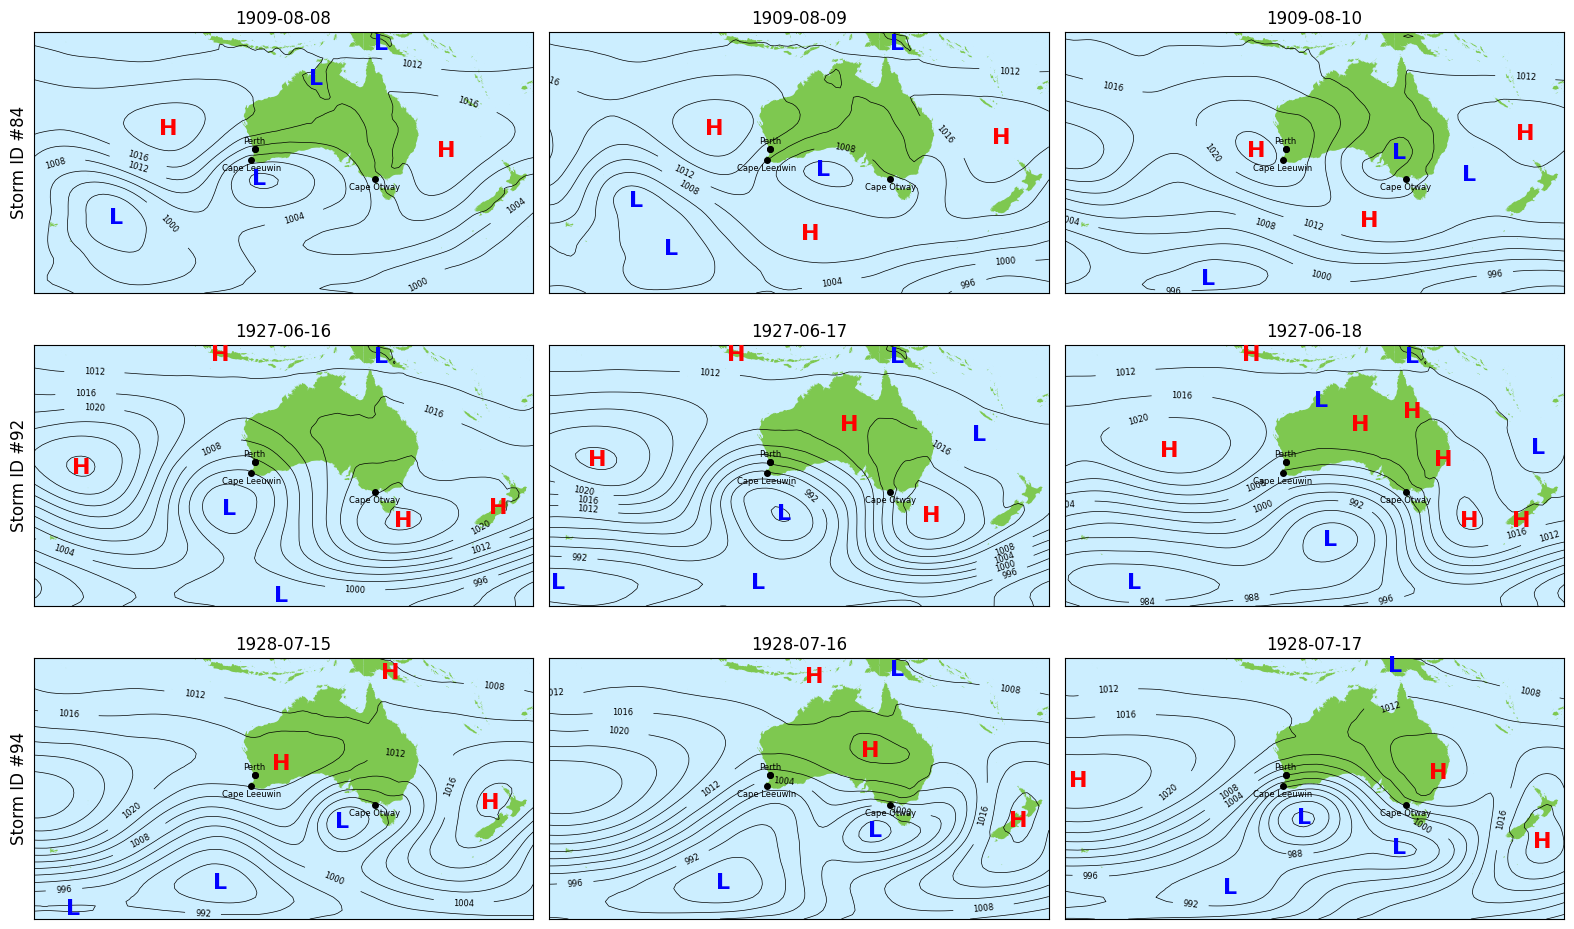

In [41]:
fig, ax = STORM_MSLP_ONLY_Cont(['1909-08-09',
                                  '1927-06-17',
                                  '1928-07-16',], 
                                  Daily_Pressure,
                                  ['Storm ID #84', 'Storm ID #92','Storm ID #94'])


#fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\20CR_Storms_Synoptic_Chart.png", dpi=300, bbox_inches='tight')
#fig.savefig(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Figure files\Direct From Script\20CR_Storms_Synoptic_Chart.png", dpi=300, bbox_inches='tight')


# FIGURE 8 UPDATE STORMS PER DECADE VS RAINDAYS PER DECADE

In [42]:
Winter_Storms_Bar = Storms_P[['Date','Rainfall']]
Winter_Storms_Bar = Winter_Storms_Bar.reset_index().drop_duplicates(subset='Storm ID').set_index('Date')



# Assume Winter_Storms_Bar['Year'] exists
years = Winter_Storms_Bar.loc[:'2019'].index.year


# Create 5-year bins starting from 1830
decade_bins = 10 * ((years - 1830) // 10) + 1830
Winter_Storms_Bar.loc[:'2019','Decade_Bin'] = decade_bins

# Group by bins and count storms
counts_WS = Winter_Storms_Bar.loc[:'2019'].groupby('Decade_Bin')['Storm ID'].count()
counts_WS.index = counts_WS.index.astype(int)
counts_WS = counts_WS.sort_index()

# List of years where data is missing
missing_years = [1830, 1850, 1870]
missing_bins = [10 * ((y - 1830) // 10) + 1830 for y in missing_years]


In [43]:
P_RD
#TO WINTER and sum by decade
P_RD_Winter = ChatJR.filter_dataframe_by_months(P_RD, [6,7,8]).resample('YS').sum()

Winter_RD_Bar = P_RD_Winter.reset_index()[['Date','RAINDAYS']]
Winter_RD_Bar = Winter_RD_Bar.set_index('Date')



# Assume Winter_Storms_Bar['Year'] exists
years = Winter_RD_Bar.loc[:'2019'].index.year


# Create 5-year bins starting from 1830
decade_bins = 10 * ((years - 1830) // 10) + 1830
Winter_RD_Bar.loc[:'2019','Decade_Bin'] = decade_bins

# Group by bins and count storms
counts_RD = Winter_RD_Bar.loc[:'2019'].groupby('Decade_Bin')['RAINDAYS'].sum()
counts_RD.index = counts_RD.index.astype(int)
counts_RD = counts_RD.sort_index()

# List of years where data is missing
missing_years = [1830, 1850, 1870]
missing_bins_WS = [10 * ((y - 1830) // 10) + 1830 for y in missing_years]
# List of years where data is missing
missing_years = [1830, 1850]
missing_bins_RD = [10 * ((y - 1830) // 10) + 1830 for y in missing_years]




In [44]:
Winter_PD_Bar = Potential_P[['Date']]
Winter_PD_Bar = Winter_PD_Bar.reset_index().drop_duplicates(subset='Storm ID').set_index('Date')



# Assume Winter_Storms_Bar['Year'] exists
years = Winter_PD_Bar.loc[:'2019'].index.year


# Create 5-year bins starting from 1830
decade_bins = 10 * ((years - 1830) // 10) + 1830
Winter_PD_Bar.loc[:'2019','Decade_Bin'] = decade_bins

# Group by bins and count storms
counts_PP = Winter_PD_Bar.loc[:'2019'].groupby('Decade_Bin')['Storm ID'].count()
counts_PP.index = counts_PP.index.astype(int)
counts_PP = counts_PP.sort_index()

# List of years where data is missing
missing_years = [1830, 1850, 1870]
missing_bins_PP = [10 * ((y - 1830) // 10) + 1830 for y in missing_years]


In [45]:
counts_WS

Decade_Bin
1830    16
1840    20
1850    17
1860    22
1870    15
1880    20
1890    23
1900    23
1910    25
1920    21
1930    19
1940    22
1950    20
1960    28
1970    26
1980    18
1990    16
2000    16
2010    14
Name: Storm ID, dtype: int64

C:\Users\jarra\AppData\Local\Temp\ipykernel_5736\1562528475.py:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


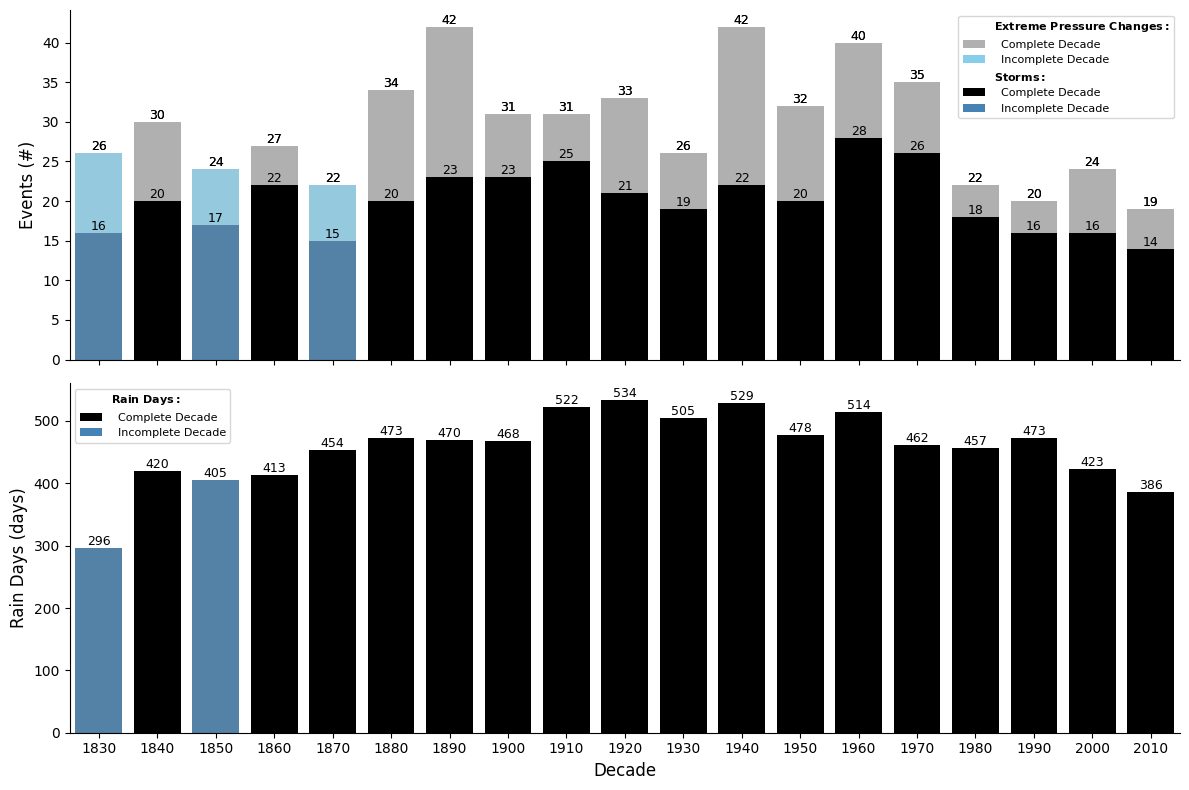

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Lets finish the data for WS
# Convert counts to a DataFrame for seaborn
df_counts_WS = counts_WS.reset_index()
df_counts_WS.columns = ["Decade", "Storms"]

# Mark which bins are incomplete
df_counts_WS["Status"] = df_counts_WS["Decade"].apply(
    lambda x: "Incomplete" if x in missing_bins_WS else "Complete"
)

# Define palette: black for complete, lighter grey for incomplete
palette_WS = {"Complete": "black", "Incomplete": "steelblue"}

# Now for RAINDAYS
# Convert counts to a DataFrame for seaborn
df_counts_RD = counts_RD.reset_index()
df_counts_RD.columns = ["Decade", "RAINDAYS"]

# Mark which bins are incomplete
df_counts_RD["Status"] = df_counts_RD["Decade"].apply(
    lambda x: "Incomplete" if x in missing_bins_RD else "Complete"
)

# Define palette: black for complete, lighter grey for incomplete
palette = {"Complete": "black", "Incomplete": "steelblue"}

# Now for Potential Sotrms
# Convert counts to a DataFrame for seaborn
df_counts_PP = counts_PP.reset_index()
df_counts_PP.columns = ["Decade", "Storms"]

# Mark which bins are incomplete
df_counts_PP["Status"] = df_counts_PP["Decade"].apply(
    lambda x: "Incomplete" if x in missing_bins_PP else "Complete"
)

# Define palette: black for complete, lighter grey for incomplete
palette_PP = {"Complete": "#B0B0B0", "Incomplete": "skyblue"}



#Subplot 2 figures
fig, axes = plt.subplots(2,1,figsize=(12, 8))
#Winter Storms
ax = axes[0]
sns.barplot(
    data=df_counts_PP,
    x="Decade",
    y="Storms",
    hue="Status",
    dodge=False,
    palette=palette_PP,
    ax=ax
)

# Labels and formatting
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Extreme Pressure\nChanges (#)", fontsize=12)
ax.set_xticklabels('', rotation=0)

# Remove the legend completely
ax.get_legend().remove()


# Add text labels on top of bars, skip empty ones
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only label non-empty bars
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, color="black"
        )

sns.despine()

#Winter Storms
ax = axes[0]
sns.barplot(
    data=df_counts_WS,
    x="Decade",
    y="Storms",
    hue="Status",
    dodge=False,
    palette=palette_WS,
    ax=ax
)

# Labels and formatting
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Events (#)", fontsize=12)
ax.set_xticklabels('', rotation=0)

# Remove the legend completely
ax.get_legend().remove()


# Add text labels on top of bars, skip empty ones
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only label non-empty bars
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, color="black"
        )

sns.despine()

#Winter Storms
ax = axes[1]
sns.barplot(
    data=df_counts_RD,
    x="Decade",
    y="RAINDAYS",
    hue="Status",
    dodge=False,
    palette=palette,
    ax=ax
)

# Labels and formatting
ax.set_xlabel("Decade", fontsize=12)
ax.set_ylabel("Rain Days (days)", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Remove the legend completely
ax.get_legend().remove()


# Add text labels on top of bars, skip empty ones
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only label non-empty bars
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, color="black"
        )

sns.despine()
fig.tight_layout()



from matplotlib.patches import Patch

# Custom legend entries
legend_elements = [
    Patch(facecolor='none', edgecolor='none', label=r'$\bf{Extreme\ Pressure\ Changes:}$'),
    Patch(facecolor='#B0B0B0', label='  Complete Decade'),
    Patch(facecolor='skyblue', label='  Incomplete Decade'),
    Patch(facecolor='none', edgecolor='none', label=r'$\bf{Storms:}$'),
    Patch(facecolor='black', label='  Complete Decade'),
    Patch(facecolor='steelblue', label='  Incomplete Decade')
]

# Add the custom legend
axes[0].legend(handles=legend_elements, loc='upper right', frameon=True,fontsize = 8)

# Custom legend entries
legend_elements = [
    Patch(facecolor='none', edgecolor='none', label=r'$\bf{Rain\ Days:}$'),
    Patch(facecolor='black', label='  Complete Decade'),
    Patch(facecolor='steelblue', label='  Incomplete Decade'),]
axes[1].legend(handles=legend_elements, loc='upper left', frameon=True,fontsize = 8)

plt.show()
plt.show()

# ✅ Save using the figure object BEFORE show()
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\S10_Winter_Raindays_Storms_Style2.png", dpi=300, bbox_inches='tight')
fig.savefig(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Figure files\Direct From Script\S10_Winter_Raindays_Storms_Style2.png", dpi=300, bbox_inches='tight')


C:\Users\jarra\AppData\Local\Temp\ipykernel_5736\1048773221.py:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


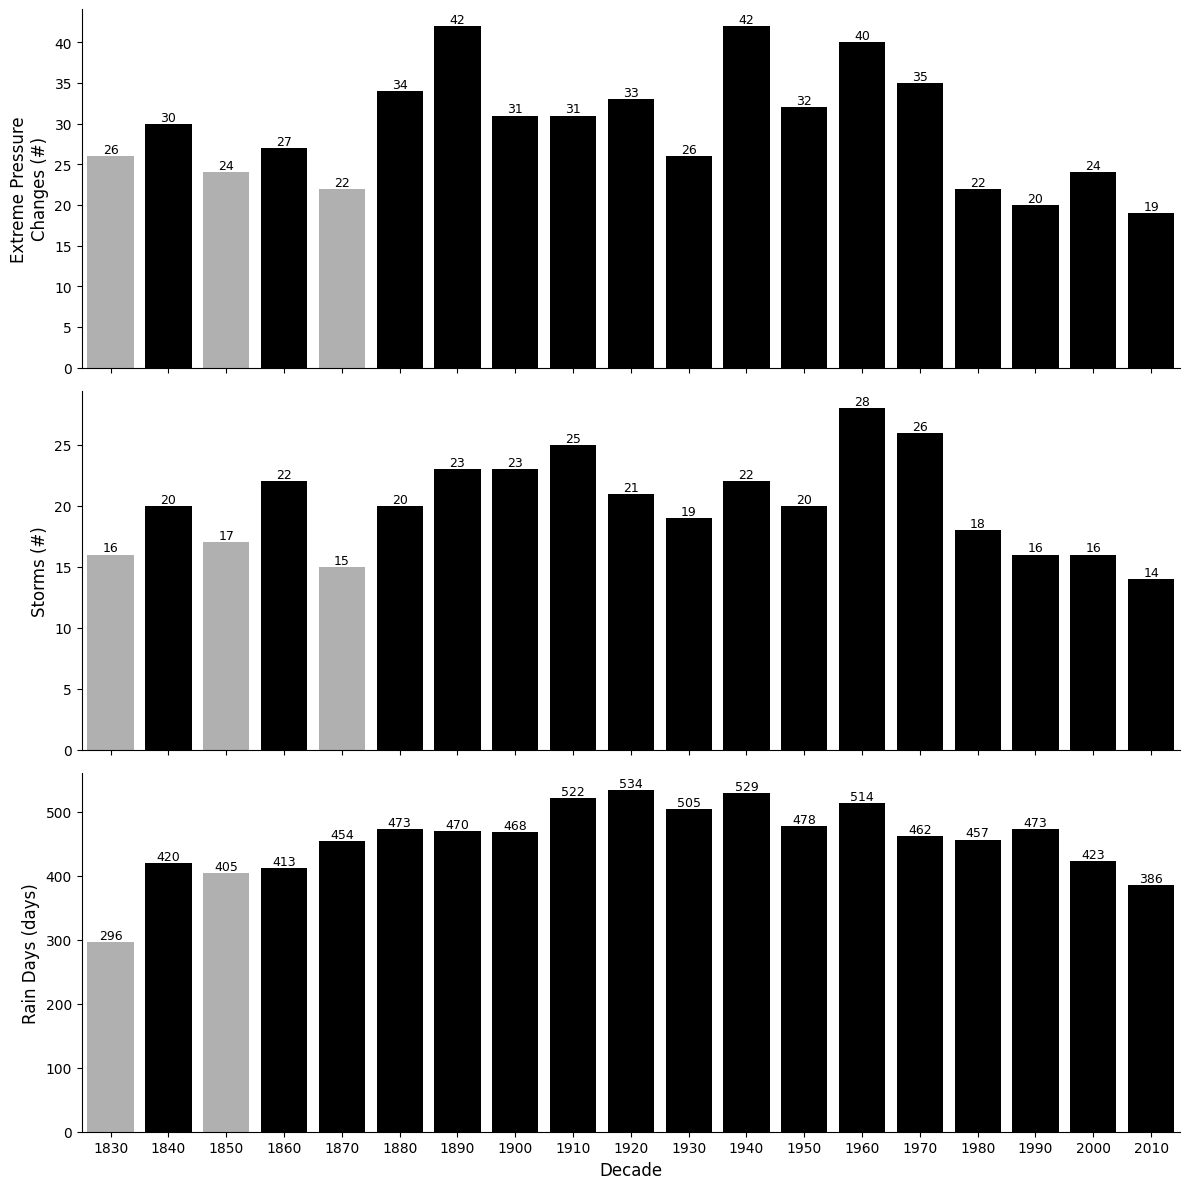

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Lets finish the data for WS
# Convert counts to a DataFrame for seaborn
df_counts_WS = counts_WS.reset_index()
df_counts_WS.columns = ["Decade", "Storms"]

# Mark which bins are incomplete
df_counts_WS["Status"] = df_counts_WS["Decade"].apply(
    lambda x: "Incomplete" if x in missing_bins_WS else "Complete"
)

# Define palette: black for complete, lighter grey for incomplete
palette_WS = {"Complete": "black", "Incomplete": "#B0B0B0"}

# Now for RAINDAYS
# Convert counts to a DataFrame for seaborn
df_counts_RD = counts_RD.reset_index()
df_counts_RD.columns = ["Decade", "RAINDAYS"]

# Mark which bins are incomplete
df_counts_RD["Status"] = df_counts_RD["Decade"].apply(
    lambda x: "Incomplete" if x in missing_bins_RD else "Complete"
)

# Define palette: black for complete, lighter grey for incomplete
palette = {"Complete": "black", "Incomplete": "#B0B0B0"}

# Now for Potential Sotrms
# Convert counts to a DataFrame for seaborn
df_counts_PP = counts_PP.reset_index()
df_counts_PP.columns = ["Decade", "Storms"]

# Mark which bins are incomplete
df_counts_PP["Status"] = df_counts_PP["Decade"].apply(
    lambda x: "Incomplete" if x in missing_bins_PP else "Complete"
)

# Define palette: black for complete, lighter grey for incomplete
palette_PP = {"Complete": "black", "Incomplete": "#B0B0B0"}



#Subplot 2 figures
fig, axes = plt.subplots(3,1,figsize=(12, 12))
#Winter Storms
ax = axes[0]
sns.barplot(
    data=df_counts_PP,
    x="Decade",
    y="Storms",
    hue="Status",
    dodge=False,
    palette=palette_PP,
    ax=ax
)

# Labels and formatting
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Extreme Pressure\nChanges (#)", fontsize=12)
ax.set_xticklabels('', rotation=0)

# Remove the legend completely
ax.get_legend().remove()


# Add text labels on top of bars, skip empty ones
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only label non-empty bars
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, color="black"
        )

sns.despine()

#Winter Storms
ax = axes[1]
sns.barplot(
    data=df_counts_WS,
    x="Decade",
    y="Storms",
    hue="Status",
    dodge=False,
    palette=palette_WS,
    ax=ax
)

# Labels and formatting
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Storms (#)", fontsize=12)
ax.set_xticklabels('', rotation=0)

# Remove the legend completely
ax.get_legend().remove()


# Add text labels on top of bars, skip empty ones
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only label non-empty bars
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, color="black"
        )

sns.despine()

#Winter Storms
ax = axes[2]
sns.barplot(
    data=df_counts_RD,
    x="Decade",
    y="RAINDAYS",
    hue="Status",
    dodge=False,
    palette=palette,
    ax=ax
)

# Labels and formatting
ax.set_xlabel("Decade", fontsize=12)
ax.set_ylabel("Rain Days (days)", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Remove the legend completely
ax.get_legend().remove()


# Add text labels on top of bars, skip empty ones
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only label non-empty bars
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, color="black"
        )

sns.despine()
fig.tight_layout()



from matplotlib.patches import Patch

plt.show()
plt.show()

# ✅ Save using the figure object BEFORE show()
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\S10_Winter_Raindays_Storms_PD_Style1.png", dpi=300, bbox_inches='tight')
fig.savefig(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Figure files\Direct From Script\S10_Winter_Raindays_Storms_PD_Style1.png", dpi=300, bbox_inches='tight')


C:\Users\jarra\AppData\Local\Temp\ipykernel_5736\502058360.py:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


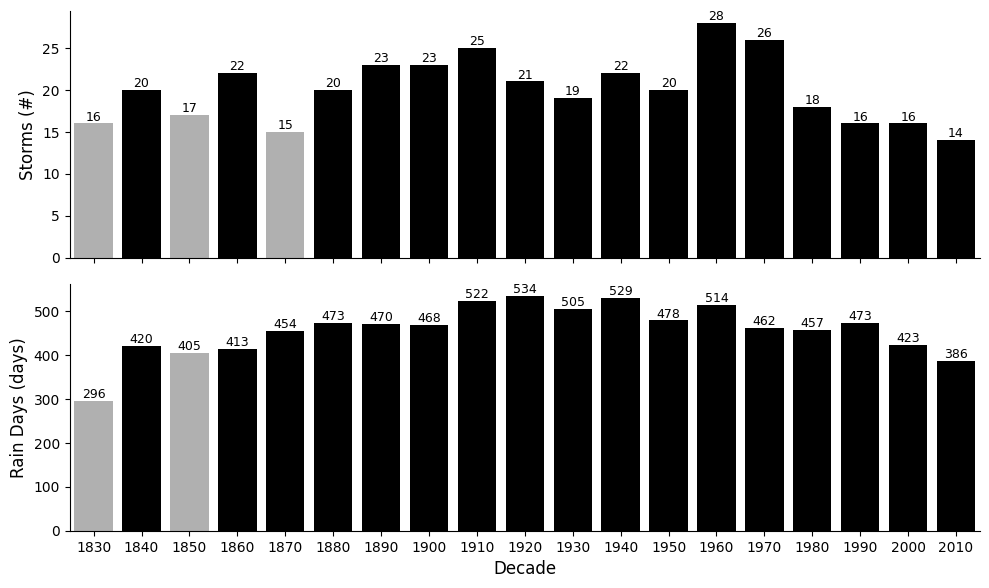

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Lets finish the data for WS
# Convert counts to a DataFrame for seaborn
df_counts_WS = counts_WS.reset_index()
df_counts_WS.columns = ["Decade", "Storms"]

# Mark which bins are incomplete
df_counts_WS["Status"] = df_counts_WS["Decade"].apply(
    lambda x: "Incomplete" if x in missing_bins_WS else "Complete"
)

# Define palette: black for complete, lighter grey for incomplete
palette_WS = {"Complete": "black", "Incomplete": "#B0B0B0"}

# Now for RAINDAYS
# Convert counts to a DataFrame for seaborn
df_counts_RD = counts_RD.reset_index()
df_counts_RD.columns = ["Decade", "RAINDAYS"]

# Mark which bins are incomplete
df_counts_RD["Status"] = df_counts_RD["Decade"].apply(
    lambda x: "Incomplete" if x in missing_bins_RD else "Complete"
)

# Define palette: black for complete, lighter grey for incomplete
palette = {"Complete": "black", "Incomplete": "#B0B0B0"}

# Now for Potential Sotrms
# Convert counts to a DataFrame for seaborn
df_counts_PP = counts_PP.reset_index()
df_counts_PP.columns = ["Decade", "Storms"]

# Mark which bins are incomplete
df_counts_PP["Status"] = df_counts_PP["Decade"].apply(
    lambda x: "Incomplete" if x in missing_bins_PP else "Complete"
)

# Define palette: black for complete, lighter grey for incomplete
palette_PP = {"Complete": "black", "Incomplete": "#B0B0B0"}



#Subplot 2 figures
fig, axes = plt.subplots(2,1,figsize=(10,6))
#Winter Storms
ax = axes[0]
#Winter Storms
sns.barplot(
    data=df_counts_WS,
    x="Decade",
    y="Storms",
    hue="Status",
    dodge=False,
    palette=palette_WS,
    ax=ax
)

# Labels and formatting
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Storms (#)", fontsize=12)
ax.set_xticklabels('', rotation=0)

# Remove the legend completely
ax.get_legend().remove()


# Add text labels on top of bars, skip empty ones
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only label non-empty bars
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, color="black"
        )

sns.despine()

#Winter Storms
ax = axes[1]
sns.barplot(
    data=df_counts_RD,
    x="Decade",
    y="RAINDAYS",
    hue="Status",
    dodge=False,
    palette=palette,
    ax=ax
)

# Labels and formatting
ax.set_xlabel("Decade", fontsize=12)
ax.set_ylabel("Rain Days (days)", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Remove the legend completely
ax.get_legend().remove()


# Add text labels on top of bars, skip empty ones
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only label non-empty bars
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, color="black"
        )

sns.despine()
fig.tight_layout()



from matplotlib.patches import Patch

plt.show()
plt.show()

# ✅ Save using the figure object BEFORE show()
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\F8_Winter_Raindays_Storms.png", dpi=300, bbox_inches='tight')
fig.savefig(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Figure files\Direct From Script\F8_Winter_Raindays_Storms.png", dpi=300, bbox_inches='tight')




# Figure 8. Update